TASK 1


In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame


from StringIO import StringIO

In [2]:
address = 'adult.data'
adult = pd.read_csv(address,sep = ",",header = None,names = ['age','workclass','fnlwgt','education','education_num','marital','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','country','income'],encoding='utf-8')
adult.head(50)

age          workclass  fnlwgt      education  education_num  \
0    39          State-gov   77516      Bachelors             13   
1    50   Self-emp-not-inc   83311      Bachelors             13   
2    38            Private  215646        HS-grad              9   
3    53            Private  234721           11th              7   
4    28            Private  338409      Bachelors             13   
5    37            Private  284582        Masters             14   
6    49            Private  160187            9th              5   
7    52   Self-emp-not-inc  209642        HS-grad              9   
8    31            Private   45781        Masters             14   
9    42            Private  159449      Bachelors             13   
10   37            Private  280464   Some-college             10   
11   30          State-gov  141297      Bachelors             13   
12   23            Private  122272      Bachelors             13   
13   32            Private  205019     Assoc-acdm             12   
14   40            Private  121772      Assoc-voc             11   
15   34            Private  245487        7th-8th              4   
16   25   Self-emp-not-inc  176756        HS-grad              9   
17   32            Private  186824        HS-grad              9   
18   38            Private   28887           11th              7   
19   43   Self-emp-not-inc  292175        Masters             14   
20   40            Private  193524      Doctorate             16   
21   54            Private  302146        HS-grad              9   
22   35        Federal-gov   76845            9th              5   
23   43            Private  117037           11th              7   
24   59            Private  109015        HS-grad              9   
25   56          Local-gov  216851      Bachelors             13   
26   19            Private  168294        HS-grad              9   
27   54                  ?  180211   Some-college             10   
28   39            Private  367260        HS-grad              9   
29   49            Private  193366        HS-grad              9   
30   23          Local-gov  190709     Assoc-acdm             12   
31   20            Private  266015   Some-college             10   
32   45            Private  386940      Bachelors             13   
33   30        Federal-gov   59951   Some-college             10   
34   22          State-gov  311512   Some-college             10   
35   48            Private  242406           11th              7   
36   21            Private  197200   Some-college             10   
37   19            Private  544091        HS-grad              9   
38   31            Private   84154   Some-college             10   
39   48   Self-emp-not-inc  265477     Assoc-acdm             12   
40   31            Private  507875            9th              5   
41   53   Self-emp-not-inc   88506      Bachelors             13   
42   24            Private  172987      Bachelors             13   
43   49            Private   94638        HS-grad              9   
44   25            Private  289980        HS-grad              9   
45   57        Federal-gov  337895      Bachelors             13   
46   53            Private  144361        HS-grad              9   
47   44            Private  128354        Masters             14   
48   41          State-gov  101603      Assoc-voc             11   
49   29            Private  271466      Assoc-voc             11   

                   marital          occupation    relationship  \
0            Never-married        Adm-clerical   Not-in-family   
1       Married-civ-spouse     Exec-managerial         Husband   
2                 Divorced   Handlers-cleaners   Not-in-family   
3       Married-civ-spouse   Handlers-cleaners         Husband   
4       Married-civ-spouse      Prof-specialty            Wife   
5       Married-civ-spouse     Exec-managerial            Wife   
6    Married-spouse-absent       Other-service   Not-in-family   
7      

In [3]:
adult.shape

(32561, 15)

In [4]:
adult.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital           object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
country           object
income            object
dtype: object

In [5]:
adult['workclass'] = adult['workclass'].astype('category')
adult['education'] = adult['education'].astype('category')
adult['marital'] = adult['marital'].astype('category')
adult['occupation'] = adult['occupation'].astype('category')
adult['relationship'] = adult['relationship'].astype('category')
adult['race'] = adult['race'].astype('category')
adult['sex'] = adult['sex'].astype('category')
adult['country'] = adult['country'].astype('category')
adult['income'] = adult['income'].astype('category')

In [6]:
adult.dtypes

age                  int64
workclass         category
fnlwgt               int64
education         category
education_num        int64
marital           category
occupation        category
relationship      category
race              category
sex               category
capital_gain         int64
capital_loss         int64
hours_per_week       int64
country           category
income            category
dtype: object

In [7]:
for col in adult.columns:
    print adult[col].value_counts(), '\n'

36    898
31    888
34    886
23    877
35    876
33    875
28    867
30    861
37    858
25    841
27    835
32    828
38    827
39    816
29    813
41    808
24    798
40    794
26    785
42    780
43    770
22    765
20    753
46    737
45    734
44    724
21    720
19    712
47    708
50    602
     ... 
60    312
61    300
62    258
63    230
64    208
65    178
67    151
66    150
68    120
69    108
70     89
71     72
72     67
73     64
74     51
76     46
75     45
90     43
77     29
78     23
80     22
79     22
81     20
82     12
84     10
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64 

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64 

164190     13
203488     13
123011     13
113364     12
121124     12
126675 

In [8]:
for col in adult.columns:
    if (adult[col].dtype.name in ['category', 'str', 'object']):
        adult[col] = adult[col].str.strip()
        adult[col] = adult[col].str.lower()

In [9]:
adult.replace('?',np.nan, inplace=True)

In [10]:
adult.head(50)

age         workclass  fnlwgt     education  education_num  \
0    39         state-gov   77516     bachelors             13   
1    50  self-emp-not-inc   83311     bachelors             13   
2    38           private  215646       hs-grad              9   
3    53           private  234721          11th              7   
4    28           private  338409     bachelors             13   
5    37           private  284582       masters             14   
6    49           private  160187           9th              5   
7    52  self-emp-not-inc  209642       hs-grad              9   
8    31           private   45781       masters             14   
9    42           private  159449     bachelors             13   
10   37           private  280464  some-college             10   
11   30         state-gov  141297     bachelors             13   
12   23           private  122272     bachelors             13   
13   32           private  205019    assoc-acdm             12   
14   40           private  121772     assoc-voc             11   
15   34           private  245487       7th-8th              4   
16   25  self-emp-not-inc  176756       hs-grad              9   
17   32           private  186824       hs-grad              9   
18   38           private   28887          11th              7   
19   43  self-emp-not-inc  292175       masters             14   
20   40           private  193524     doctorate             16   
21   54           private  302146       hs-grad              9   
22   35       federal-gov   76845           9th              5   
23   43           private  117037          11th              7   
24   59           private  109015       hs-grad              9   
25   56         local-gov  216851     bachelors             13   
26   19           private  168294       hs-grad              9   
27   54               NaN  180211  some-college             10   
28   39           private  367260       hs-grad              9   
29   49           private  193366       hs-grad              9   
30   23         local-gov  190709    assoc-acdm             12   
31   20           private  266015  some-college             10   
32   45           private  386940     bachelors             13   
33   30       federal-gov   59951  some-college             10   
34   22         state-gov  311512  some-college             10   
35   48           private  242406          11th              7   
36   21           private  197200  some-college             10   
37   19           private  544091       hs-grad              9   
38   31           private   84154  some-college             10   
39   48  self-emp-not-inc  265477    assoc-acdm             12   
40   31           private  507875           9th              5   
41   53  self-emp-not-inc   88506     bachelors             13   
42   24           private  172987     bachelors             13   
43   49           private   94638       hs-grad              9   
44   25           private  289980       hs-grad              9   
45   57       federal-gov  337895     bachelors             13   
46   53           private  144361       hs-grad              9   
47   44           private  128354       masters             14   
48   41         state-gov  101603     assoc-voc             11   
49   29           private  271466     assoc-voc             11   

                  marital         occupation   relationship  \
0           never-married       adm-clerical  not-in-family   
1      married-civ-spouse    exec-managerial        husband   
2                divorced  handlers-cleaners  not-in-family   
3      married-civ-spouse  handlers-cleaners        husband   
4      married-civ-spouse     prof-specialty           wife   
5      married-civ-spouse    exec-managerial           wife   
6   married-spouse-absent      other-service  not-in-family   
7      married-civ-spouse    exec-managerial        husband   
8           never-married     prof-specialty  not-in-family   
9      

In [11]:
adult = adult.dropna(how='any')

In [12]:
adult.shape

(30162, 15)

In [13]:
for col in adult.columns:
    print adult[col].value_counts(), '\n'

36    852
31    851
33    837
34    836
35    828
37    828
23    824
30    813
28    808
25    799
38    791
32    789
27    789
39    786
29    774
41    769
40    765
24    752
26    745
43    743
42    741
46    711
45    706
44    704
47    683
22    674
20    629
21    621
19    594
50    575
     ... 
17    328
60    276
61    259
62    213
63    186
64    173
65    136
67    111
66    110
68     90
69     80
70     64
71     54
73     49
72     40
74     38
90     35
75     34
76     29
77     20
80     16
79     15
78     14
81     13
84      8
82      7
83      5
88      3
85      3
86      1
Name: age, Length: 72, dtype: int64 

private             22286
self-emp-not-inc     2499
local-gov            2067
state-gov            1279
self-emp-inc         1074
federal-gov           943
without-pay            14
Name: workclass, dtype: int64 

203488    13
113364    12
164190    12
123011    12
148995    12
121124    12
241998    11
102308    11
126675    11
111483    11
155659  

Task 2

In [14]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sb

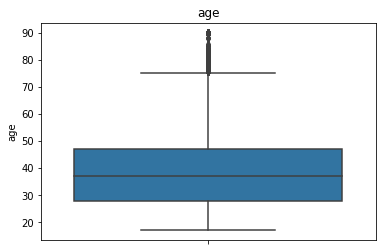

In [15]:
sb.boxplot(y= adult['age'])
plt.title('age')

plt.show()
                  

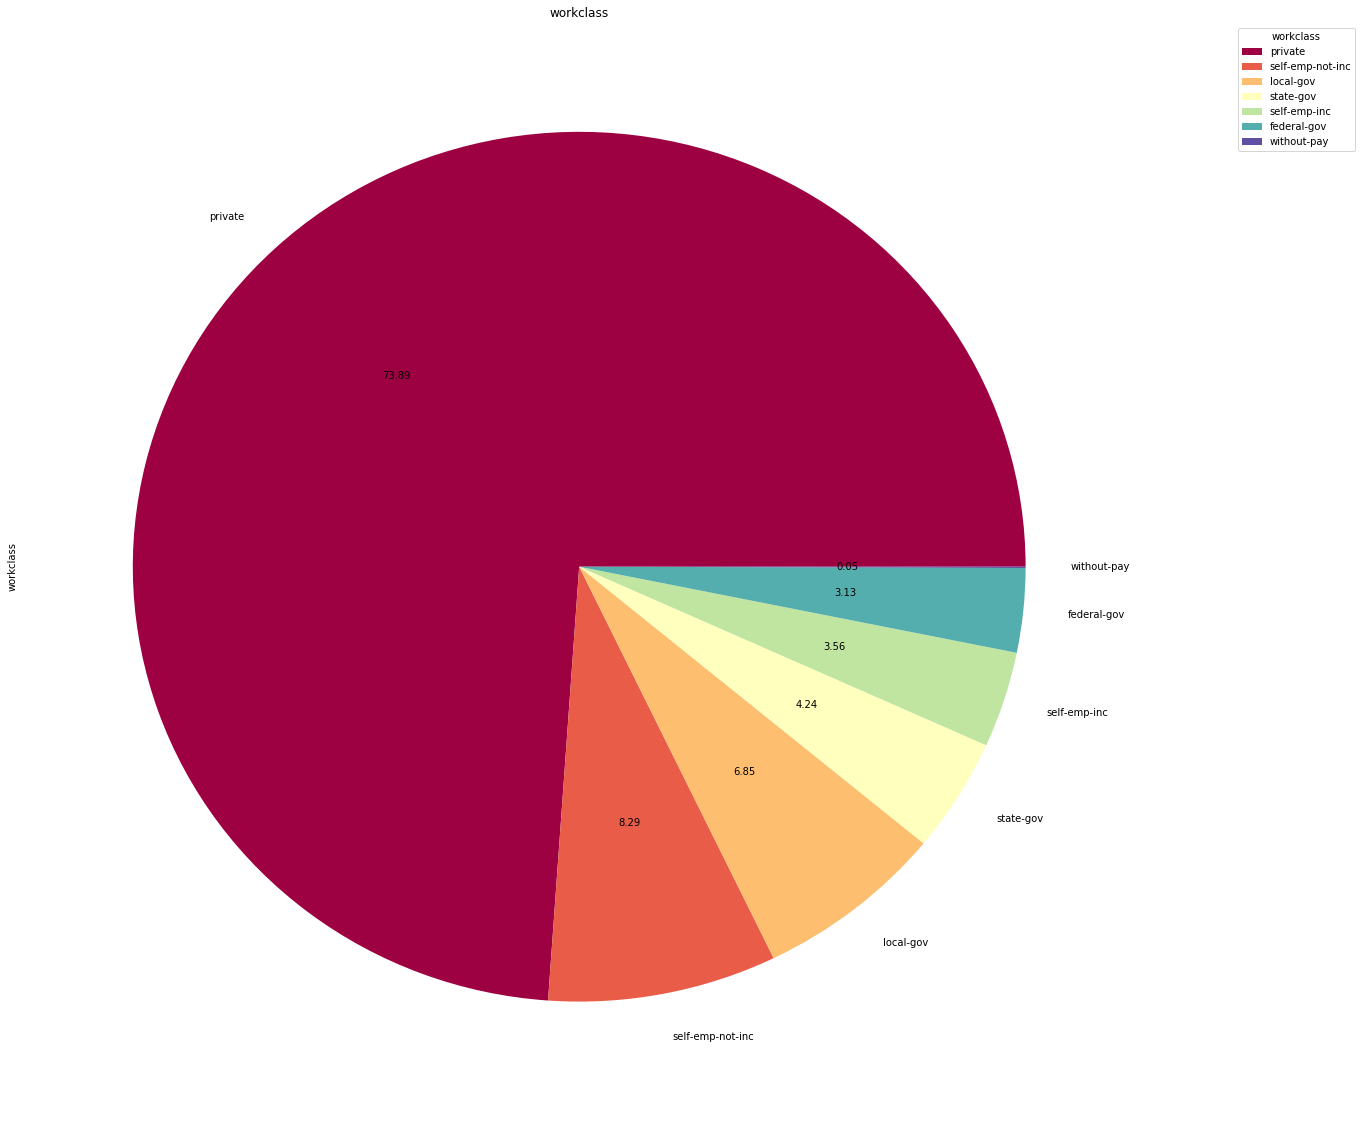

In [16]:
adult['workclass'].value_counts().plot.pie(title='workclass', legend=True, colormap='Spectral',autopct='%.2f', figsize=(20,20))
plt.legend(bbox_to_anchor=(1.2,1.0),title='workclass')
plt.show()

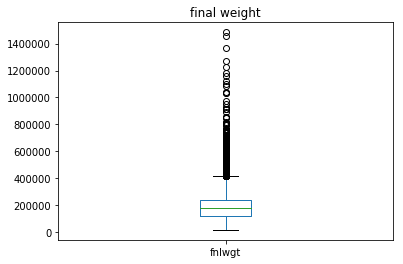

In [17]:
adult['fnlwgt'].plot(kind='box', title ='final weight')
plt.show()

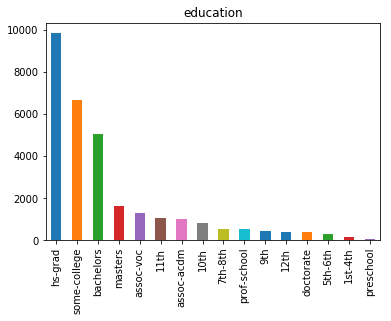

In [18]:
adult['education'].value_counts().plot(kind='bar', title ='education')
plt.show()

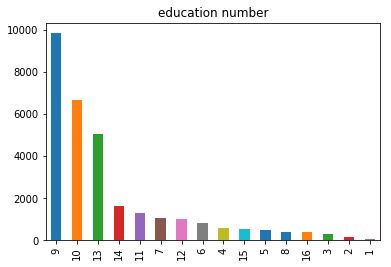

In [19]:
adult['education_num'].value_counts().plot(kind='bar', title ='education number')
plt.show()

In [20]:
adult

age         workclass  fnlwgt     education  education_num  \
0       39         state-gov   77516     bachelors             13   
1       50  self-emp-not-inc   83311     bachelors             13   
2       38           private  215646       hs-grad              9   
3       53           private  234721          11th              7   
4       28           private  338409     bachelors             13   
5       37           private  284582       masters             14   
6       49           private  160187           9th              5   
7       52  self-emp-not-inc  209642       hs-grad              9   
8       31           private   45781       masters             14   
9       42           private  159449     bachelors             13   
10      37           private  280464  some-college             10   
11      30         state-gov  141297     bachelors             13   
12      23           private  122272     bachelors             13   
13      32           private  205019    assoc-acdm             12   
15      34           private  245487       7th-8th              4   
16      25  self-emp-not-inc  176756       hs-grad              9   
17      32           private  186824       hs-grad              9   
18      38           private   28887          11th              7   
19      43  self-emp-not-inc  292175       masters             14   
20      40           private  193524     doctorate             16   
21      54           private  302146       hs-grad              9   
22      35       federal-gov   76845           9th              5   
23      43           private  117037          11th              7   
24      59           private  109015       hs-grad              9   
25      56         local-gov  216851     bachelors             13   
26      19           private  168294       hs-grad              9   
28      39           private  367260       hs-grad              9   
29      49           private  193366       hs-grad              9   
30      23         local-gov  190709    assoc-acdm             12   
31      20           private  266015  some-college             10   
...    ...               ...     ...           ...            ...   
32526   32           private  211349          10th              6   
32527   22           private  203715  some-college             10   
32528   31           private  292592       hs-grad              9   
32529   29           private  125976       hs-grad              9   
32532   34           private  204461     doctorate             16   
32533   54           private  337992     bachelors             13   
32534   37           private  179137  some-college             10   
32535   22           private  325033          12th              8   
32536   34           private  160216     bachelors             13   
32537   30           private  345898       hs-grad              9   
32538   38           private  139180     bachelors             13   
32540   45         state-gov  252208       hs-grad              9   
32543   45         local-gov  119199    assoc-acdm             12   
32544   31           private  199655       masters             14   
32545   39         local-gov  111499    assoc-acdm             12   
32546   37           private  198216    assoc-acdm             12   
32547   43           private  260761       hs-grad              9   
32548   65  self-emp-not-inc   99359   prof-school             15   
32549   43         state-gov  255835  some-college             10   
32550   43  self-emp-not-inc   27242  some-college             10   
32551   32           private   34066          10th              6   
32552   43           private   84661     assoc-voc             11   
32553   32           private  116138       masters             14   
32554   53           private  321865       masters             14   
32555   22           private  310152  some-college             10   
32556   27           private  257302    assoc-acdm             12   
32557

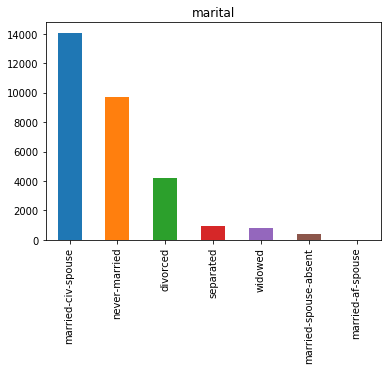

In [21]:
adult['marital'].value_counts().plot(kind='bar', title ='marital')
plt.show()

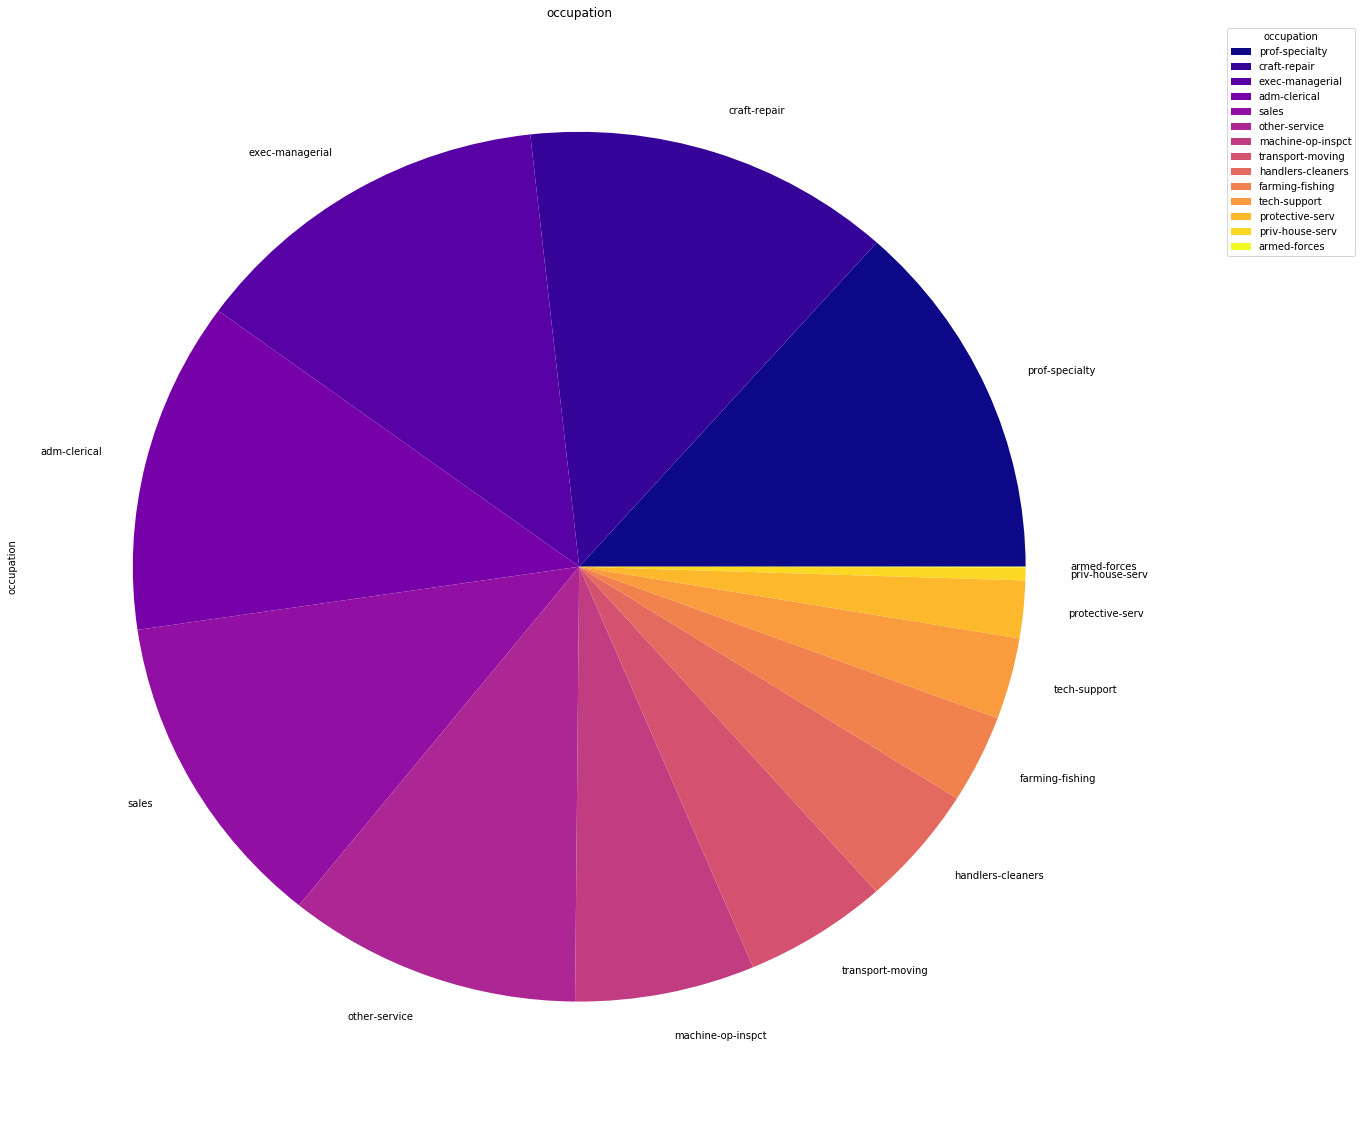

In [22]:
adult['occupation'].value_counts().plot(kind='pie', title ='occupation',colormap='plasma', figsize=(20,20))
plt.legend(bbox_to_anchor=(1.2,1.0),title='occupation')
plt.show()

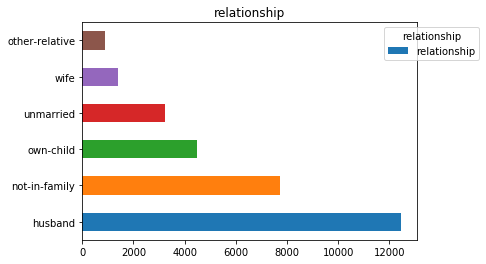

In [23]:
adult['relationship'].value_counts().plot(kind='barh', title ='relationship')
plt.legend(bbox_to_anchor=(1.2,1.0),title='relationship')
plt.show()

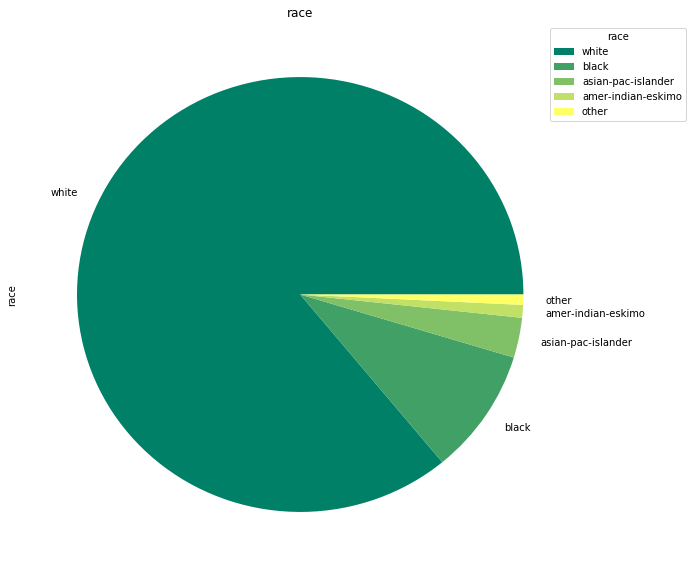

In [24]:
adult['race'].value_counts().plot(kind='pie', title ='race',colormap='summer', figsize=(10,10))
plt.legend(bbox_to_anchor=(1.2,1.0),title='race')
plt.show()

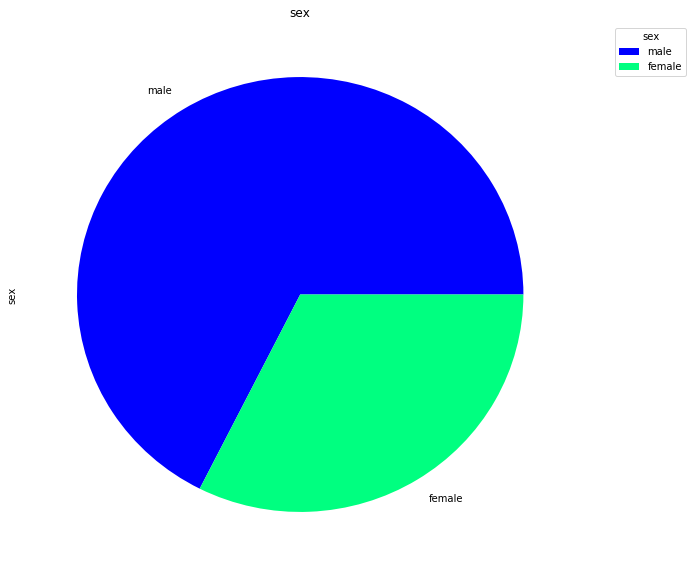

In [25]:
adult['sex'].value_counts().plot(kind='pie', title ='sex',colormap='winter', figsize=(10,10))
plt.legend(bbox_to_anchor=(1.2,1.0),title='sex')
plt.show()

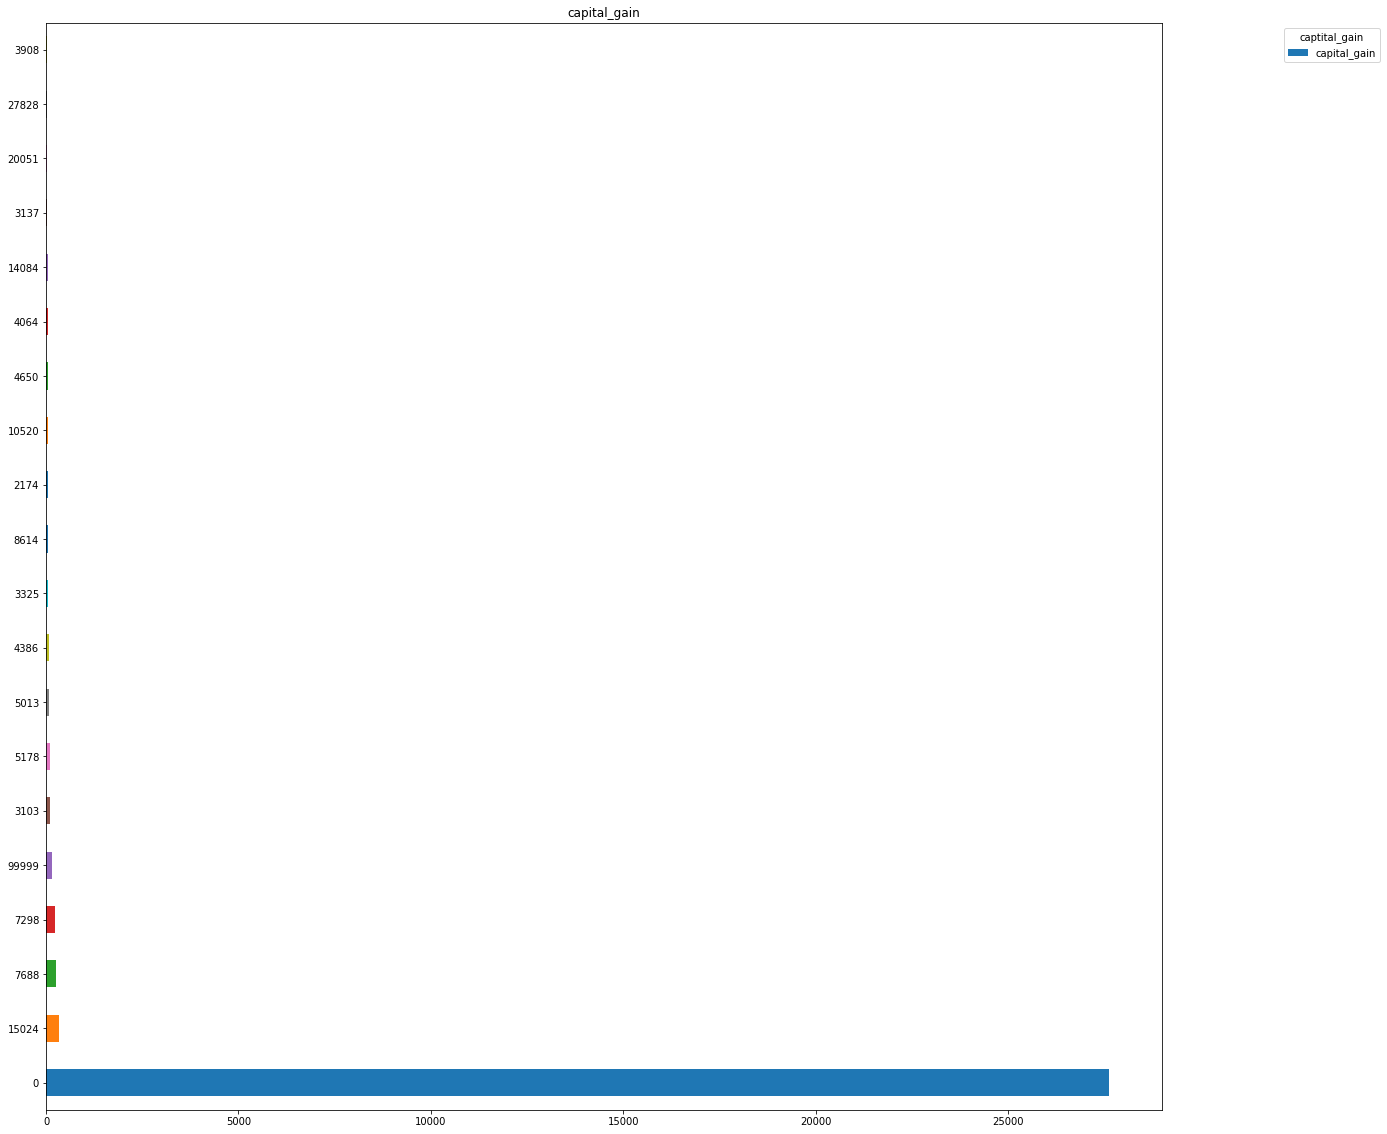

In [26]:
adult['capital_gain'].value_counts()[:20].plot(kind='barh', title ='capital_gain',figsize=(20,20))
plt.legend(bbox_to_anchor=(1.2,1.0),title='captital_gain')
plt.show()

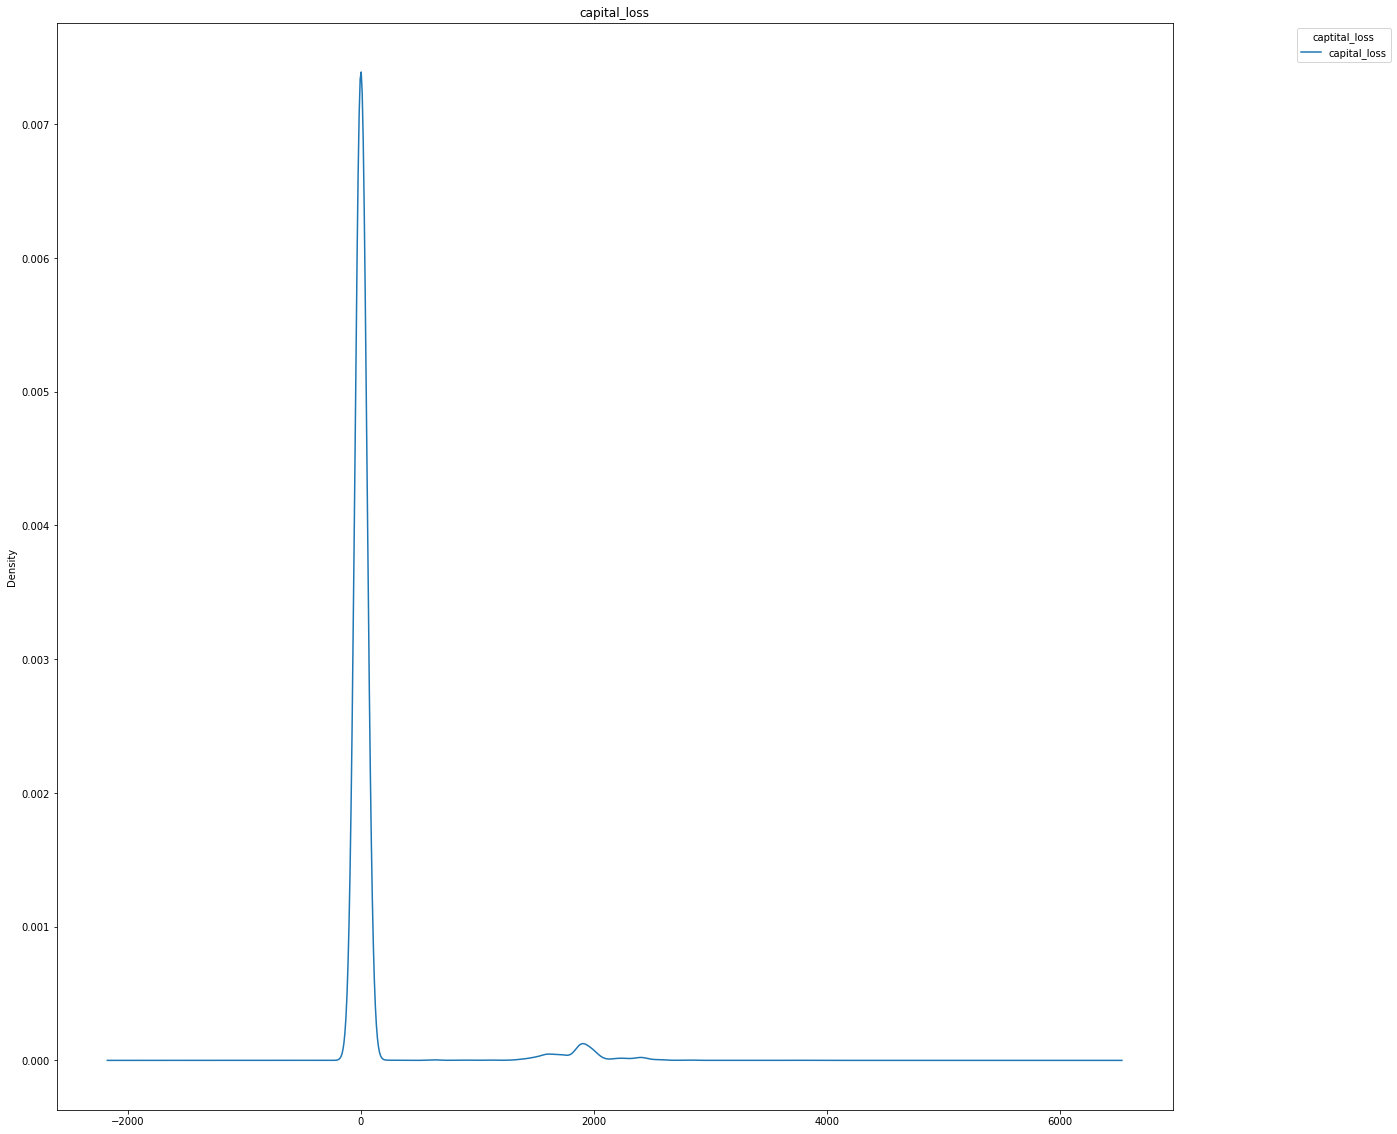

In [27]:
adult['capital_loss'].plot(kind='density', title ='capital_loss',figsize=(20,20))
plt.legend(bbox_to_anchor=(1.2,1.0),title='captital_loss')
plt.show()

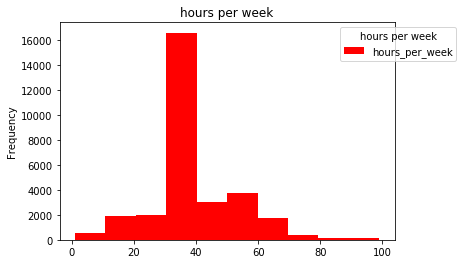

In [28]:
adult['hours_per_week'].plot(kind='hist', title ='hours per week',bins=10, colormap='autumn')
plt.legend(bbox_to_anchor=(1.2,1.0),title='hours per week')
plt.show()

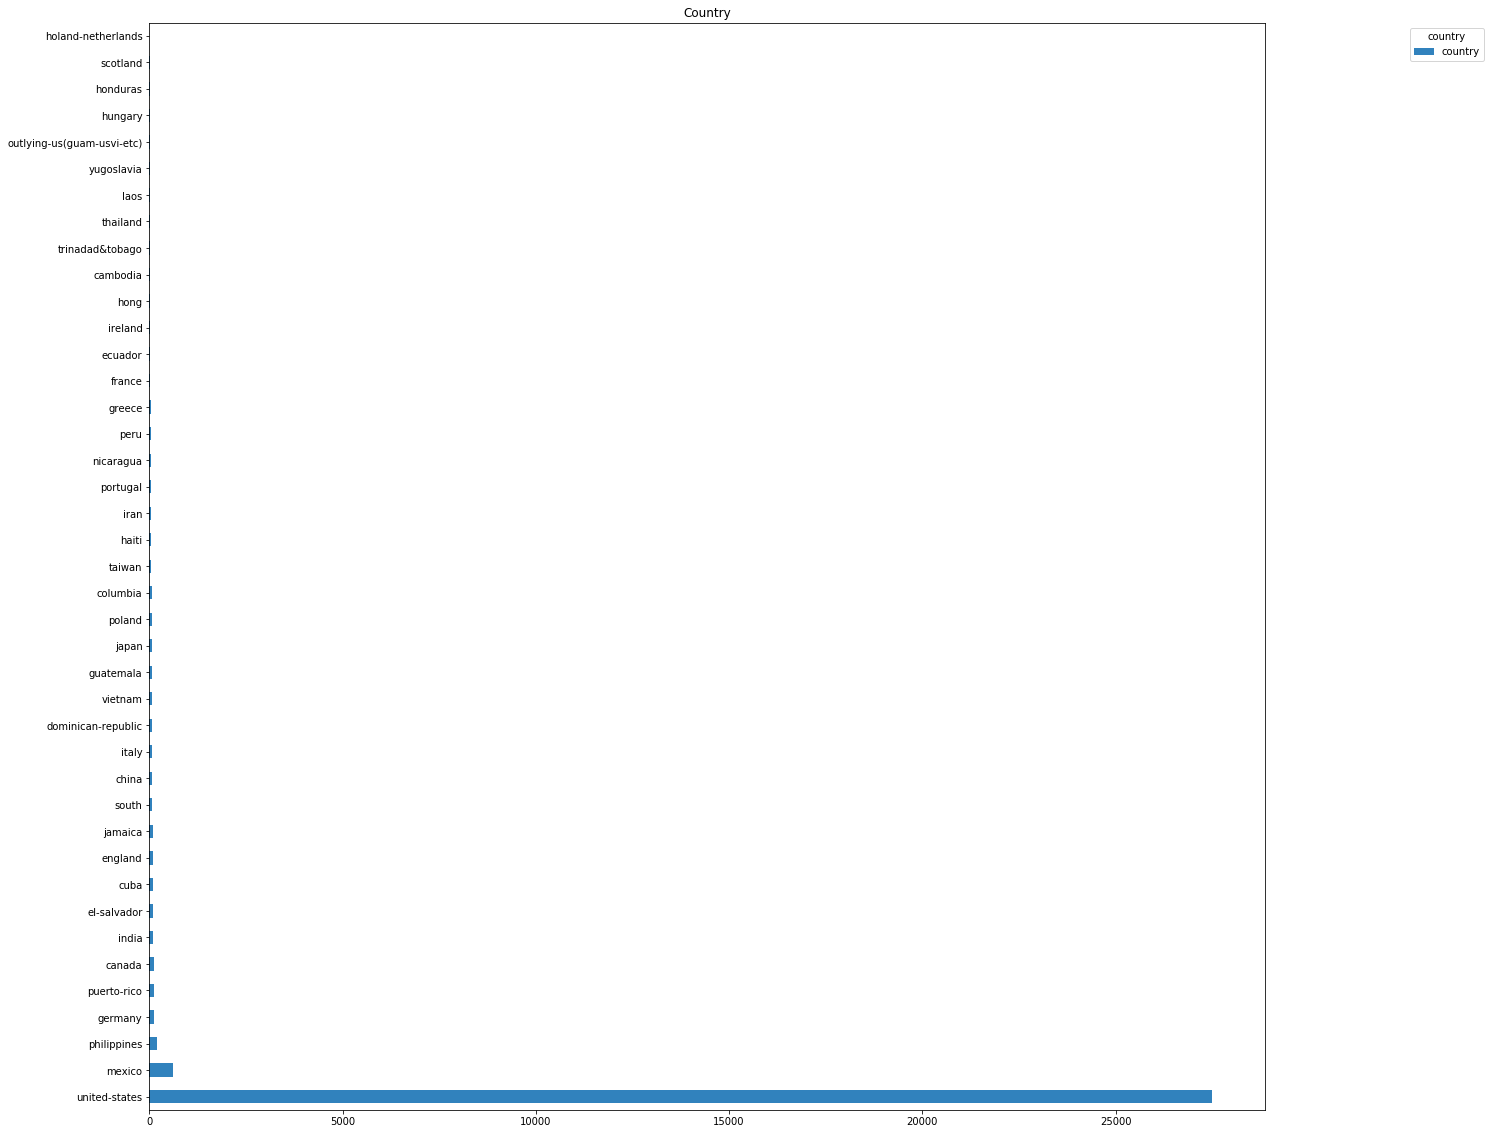

In [29]:
adult['country'].value_counts().plot(kind='barh', title ='Country',colormap='tab20c', figsize=(20,20))
plt.legend(bbox_to_anchor=(1.2,1.0),title='country')
plt.show()

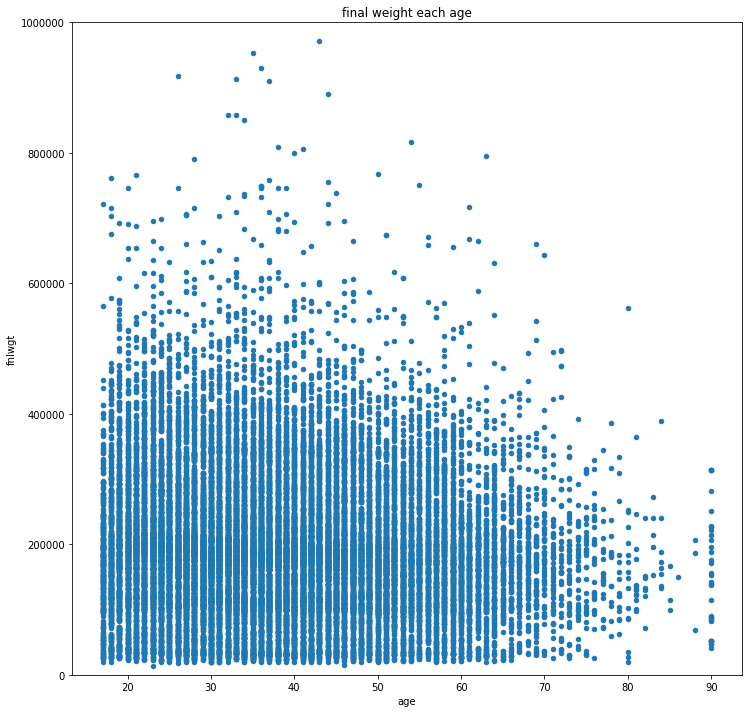

In [30]:
adult.plot(kind='scatter',x='age',y='fnlwgt', figsize=(12,12), ylim=(0,1000000))
plt.title('final weight each age')
plt.show()

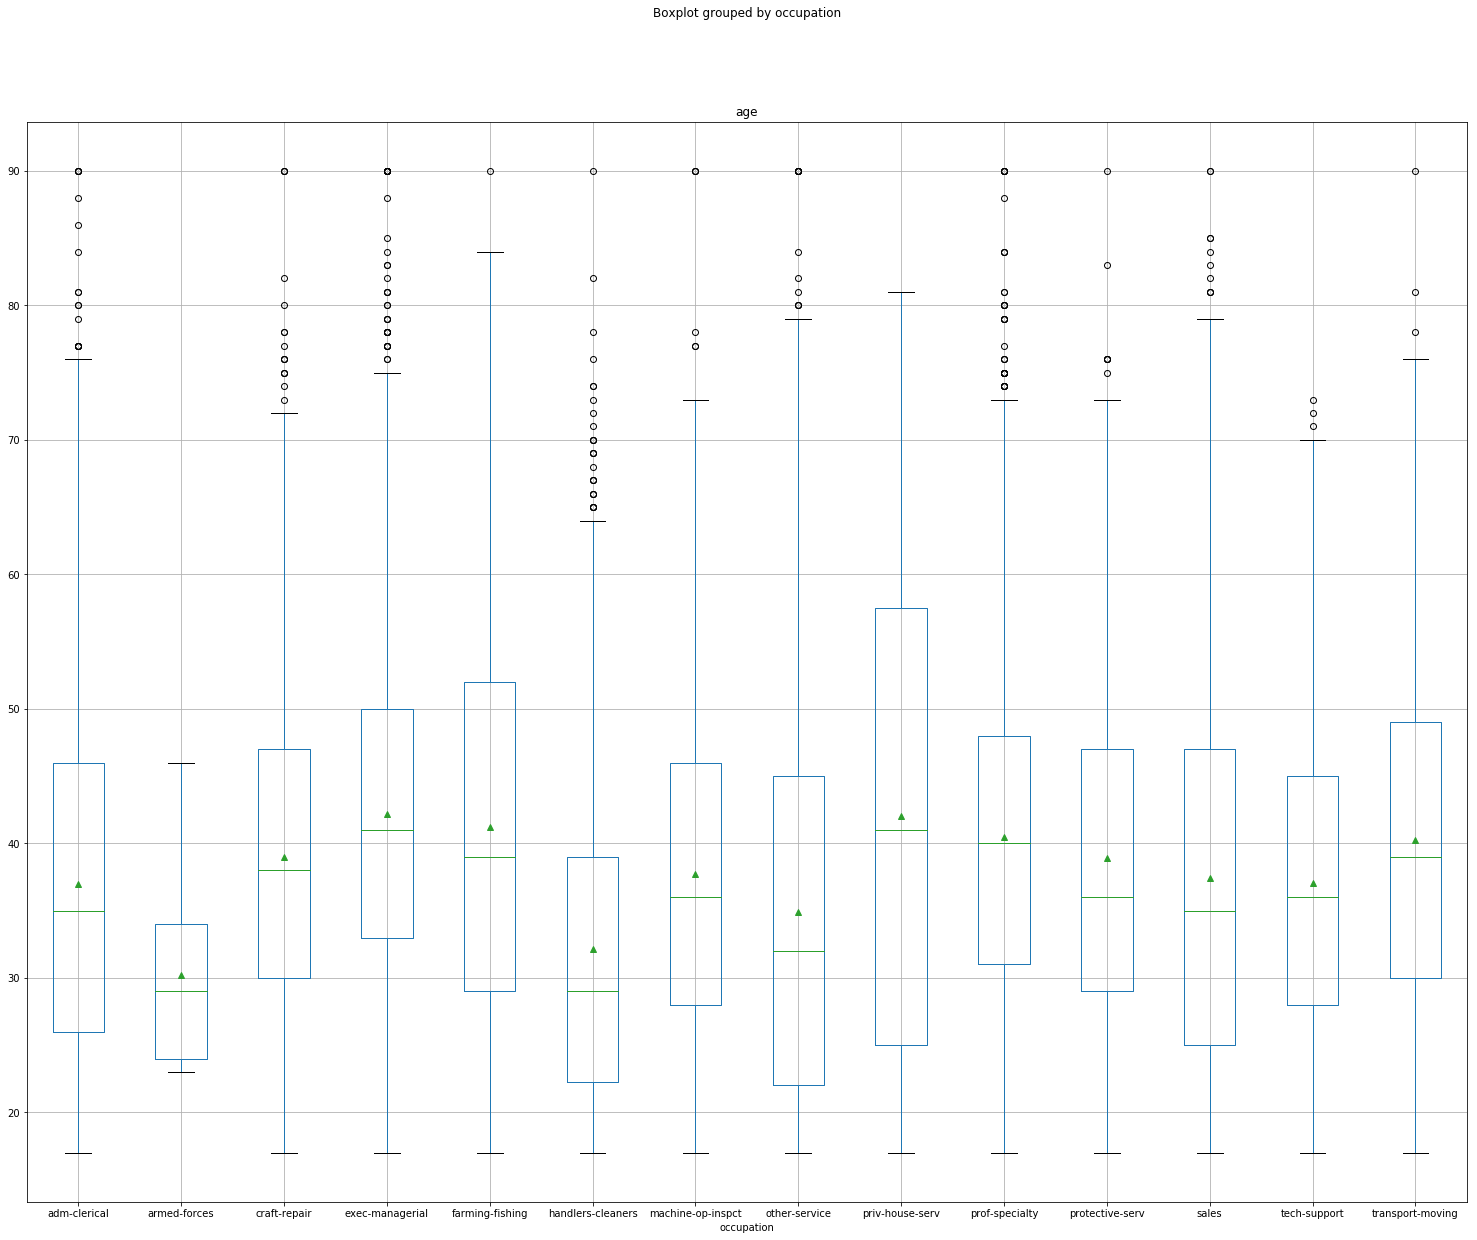

In [31]:
adult.boxplot(column='age', by='occupation',figsize=(25,20), showmeans=True)
plt.show()

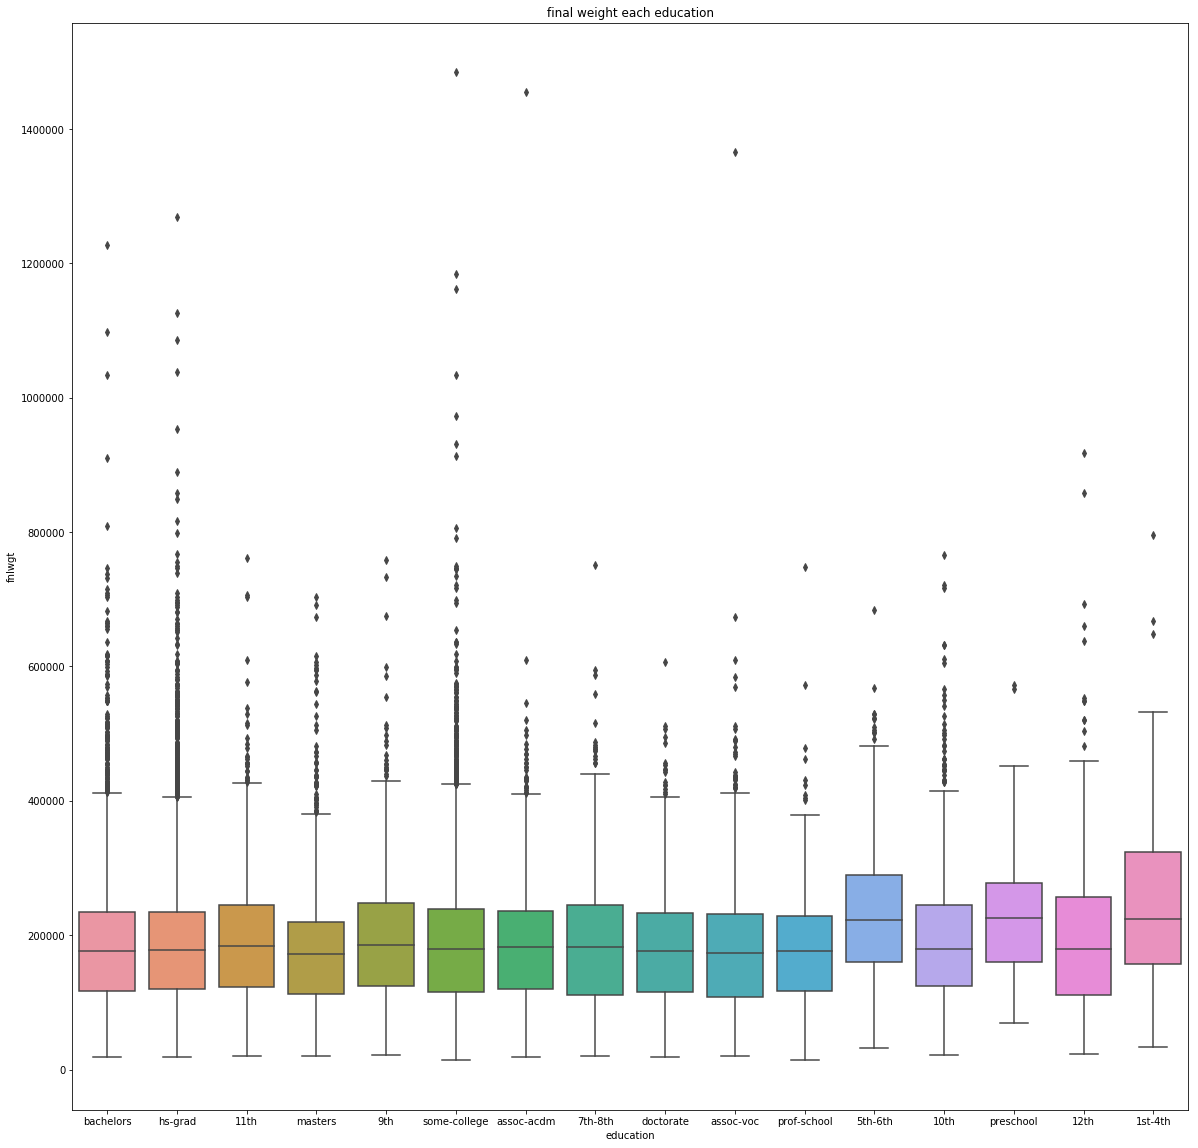

In [32]:
fig, ax = pyplot.subplots(figsize=(20,20))
plt.title('final weight each education')
sb.boxplot(x='education', y="fnlwgt", data= adult)

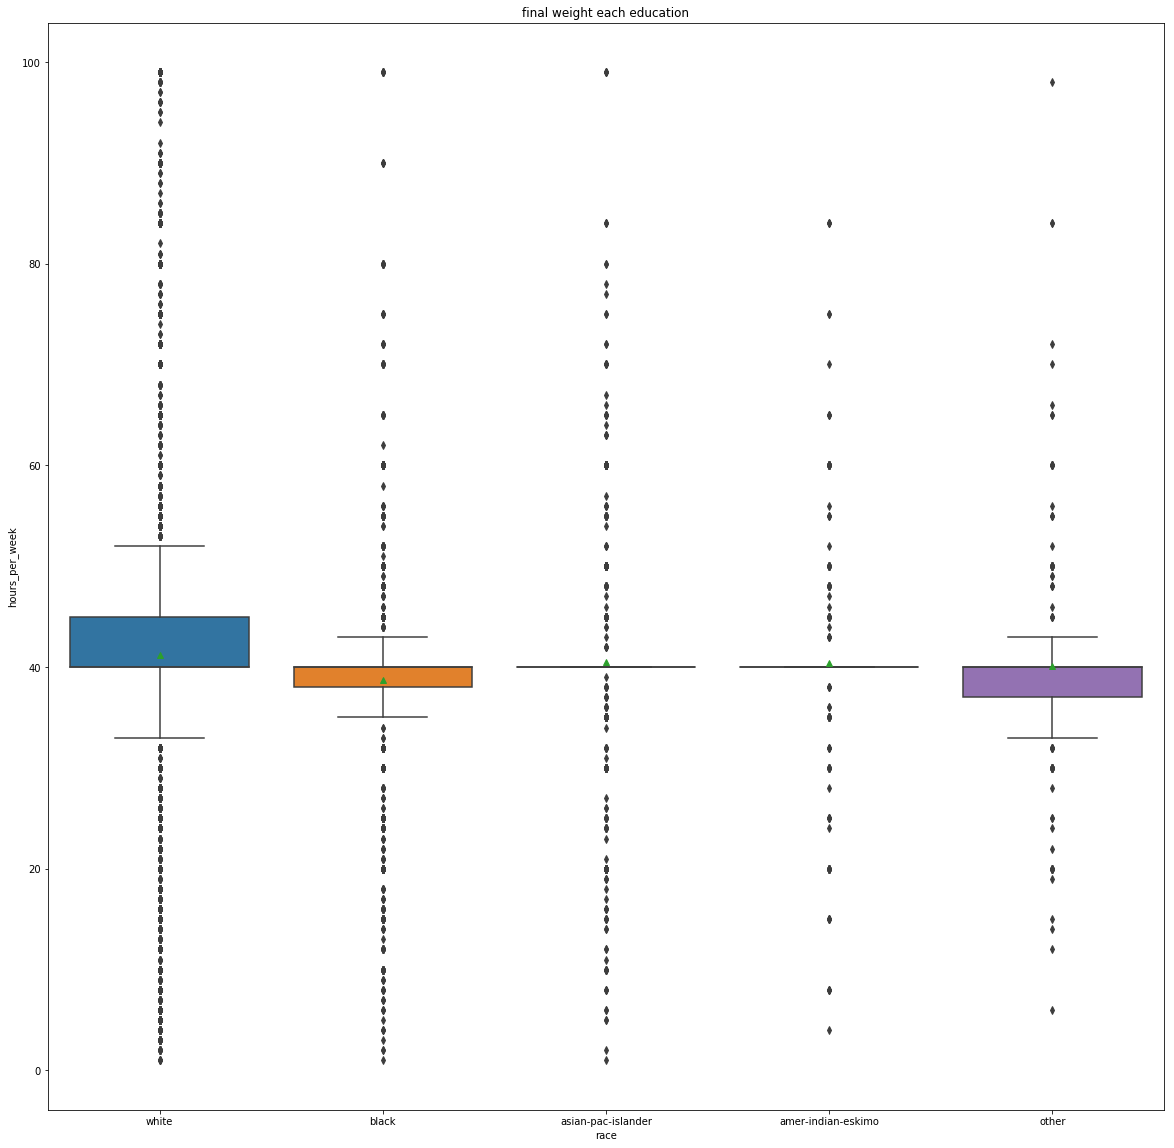

In [33]:
fig, ax = pyplot.subplots(figsize=(20,20))
plt.title('final weight each education')
sb.boxplot(x='race', y="hours_per_week", data= adult,showmeans=True)

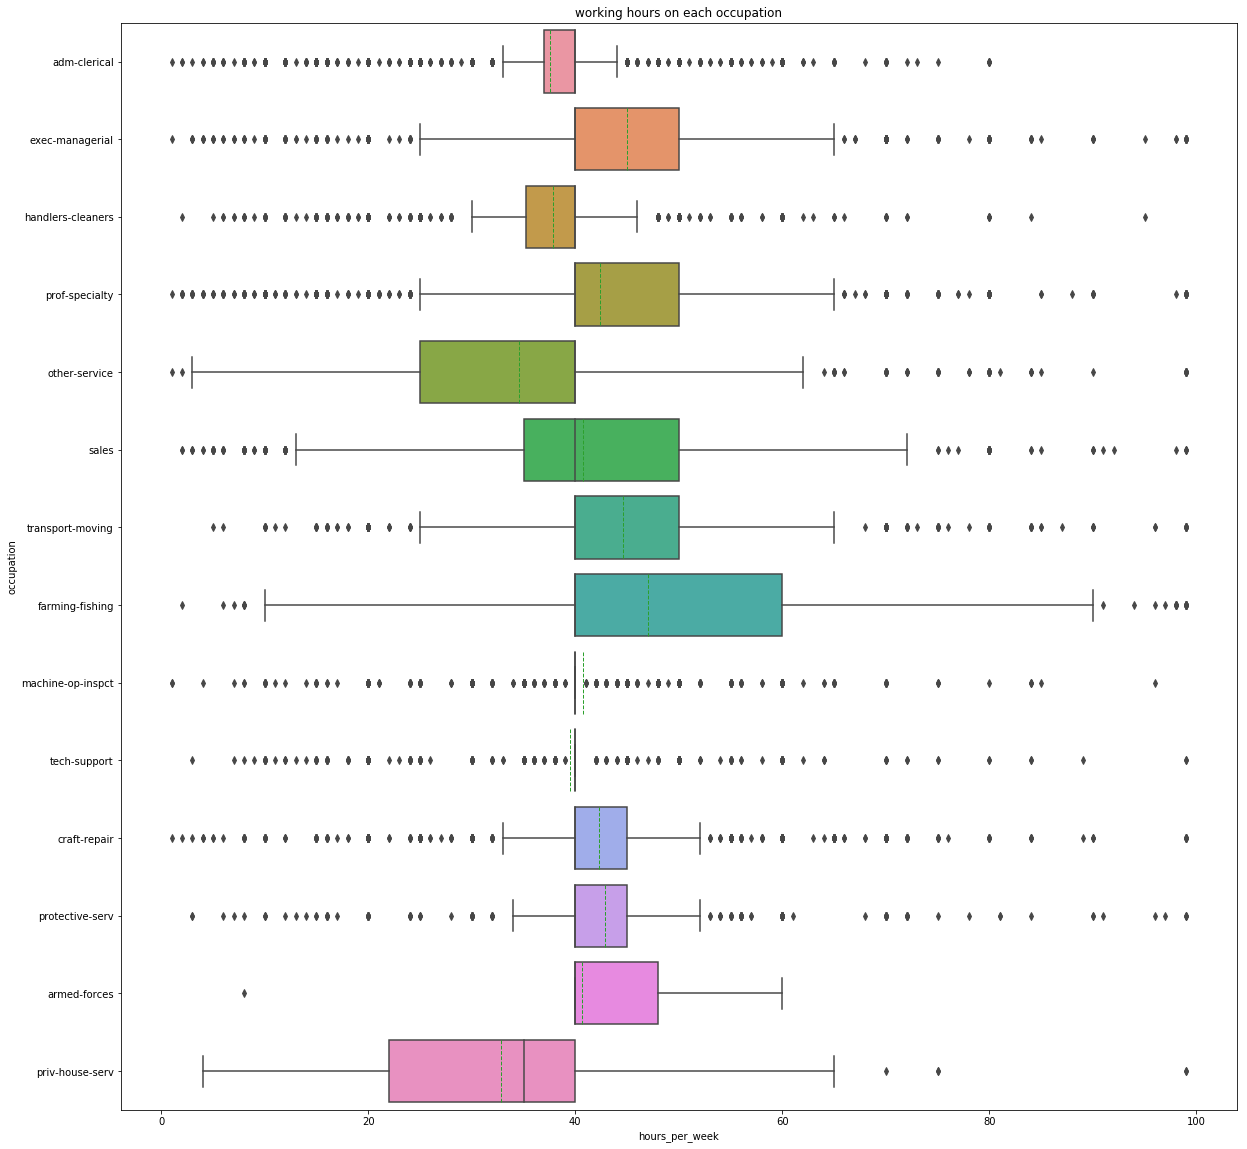

In [34]:
fig, ax = pyplot.subplots(figsize=(20,20))
plt.title('working hours on each occupation')
sb.boxplot(x='hours_per_week', y="occupation",orient="h", data= adult, showmeans=True, meanline=True)

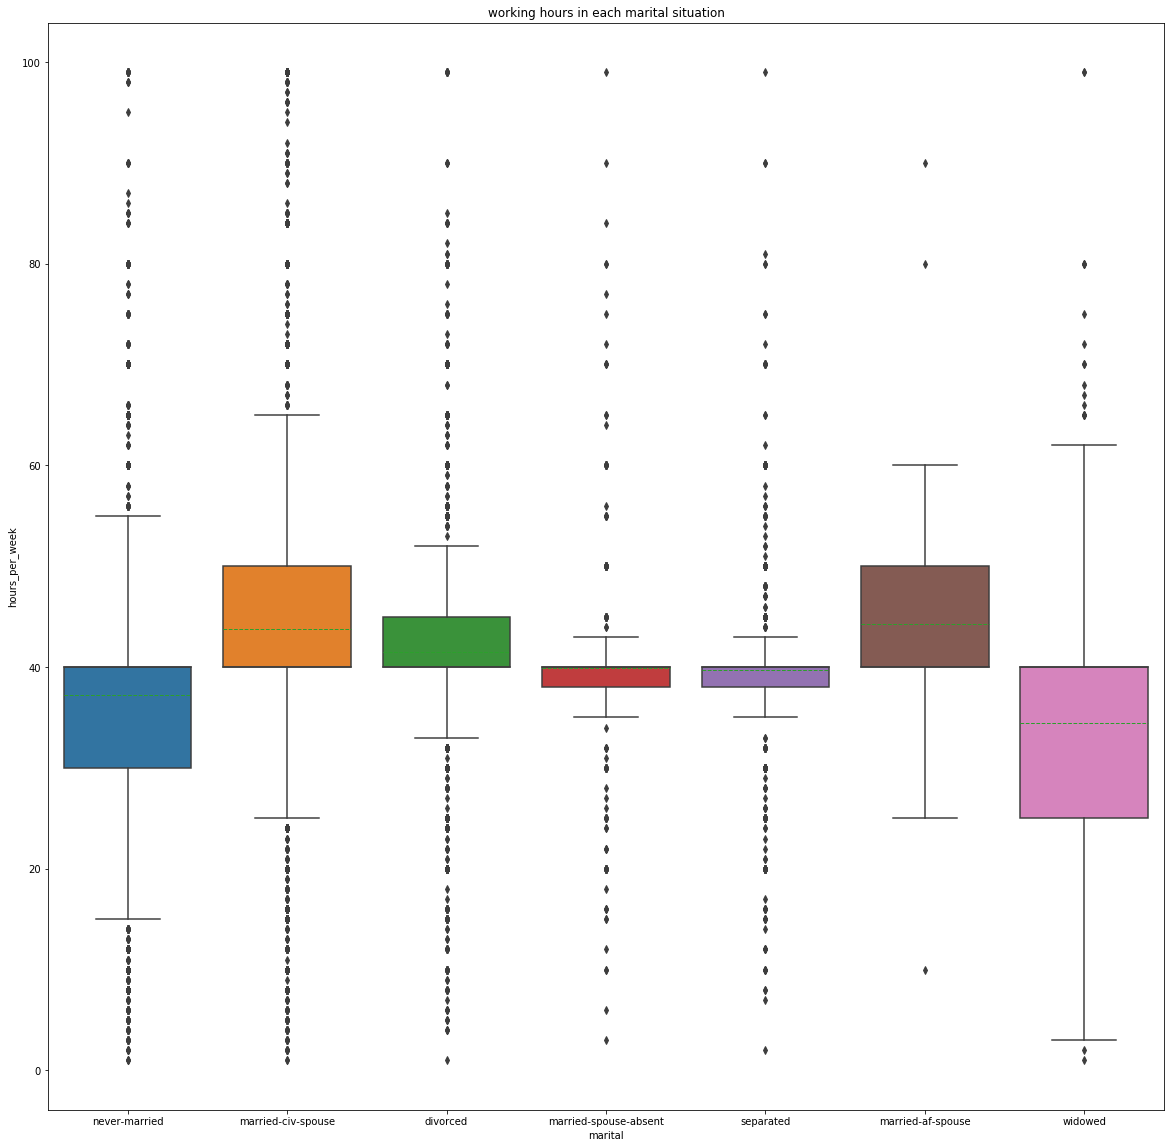

In [35]:
fig, ax = pyplot.subplots(figsize=(20,20))
plt.title('working hours in each marital situation')
sb.boxplot(x='marital', y="hours_per_week", data= adult, showmeans=True, meanline=True)

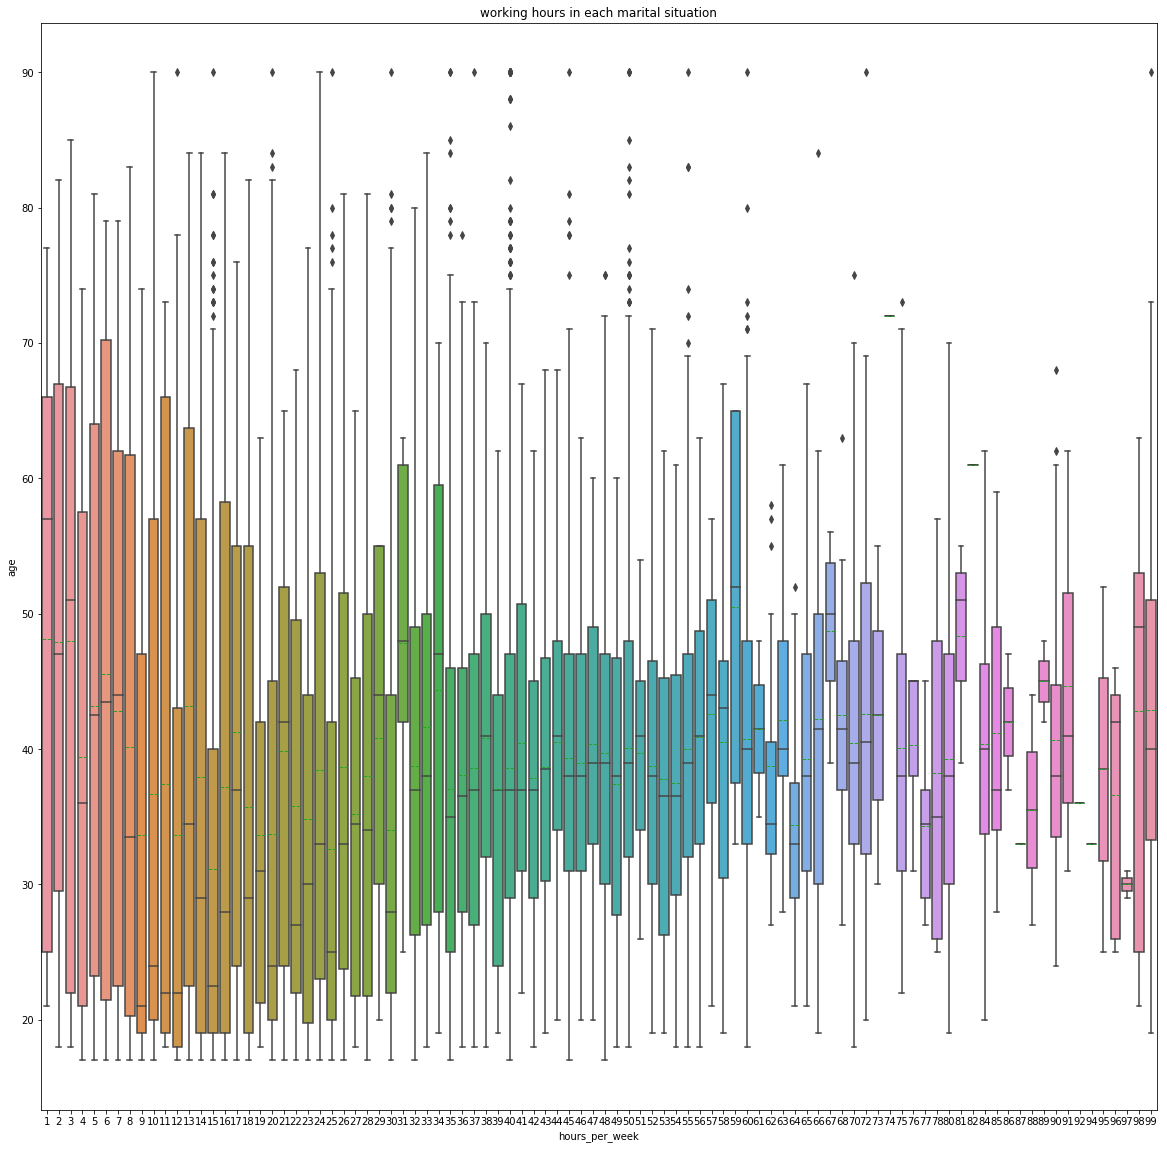

In [36]:
fig, ax = pyplot.subplots(figsize=(20,20))
plt.title('working hours in each marital situation')
sb.boxplot(x='hours_per_week', y='age', data= adult, showmeans=True, meanline=True)

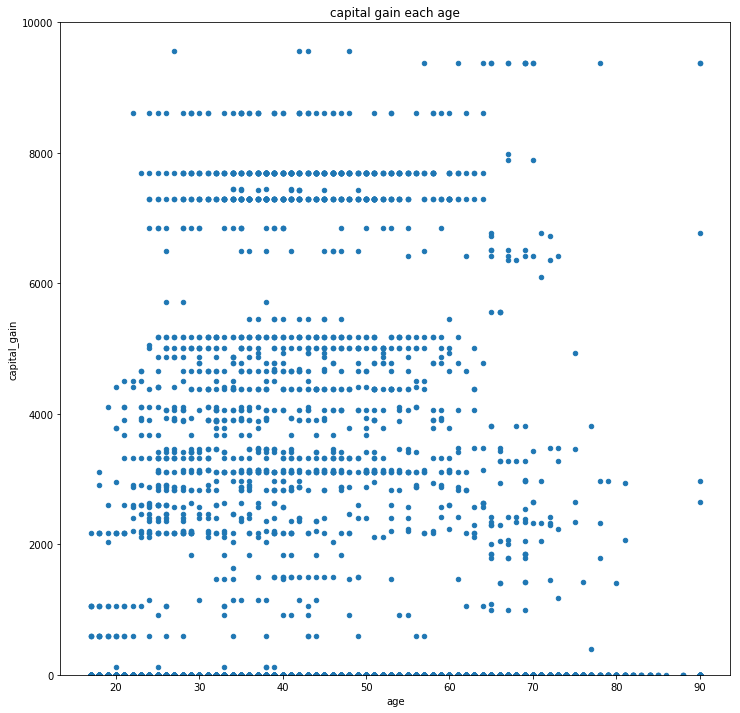

In [37]:
adult.plot(kind='scatter',x='age',y='capital_gain', figsize=(12,12), ylim=(0,10000))
plt.title('capital gain each age')
plt.show()

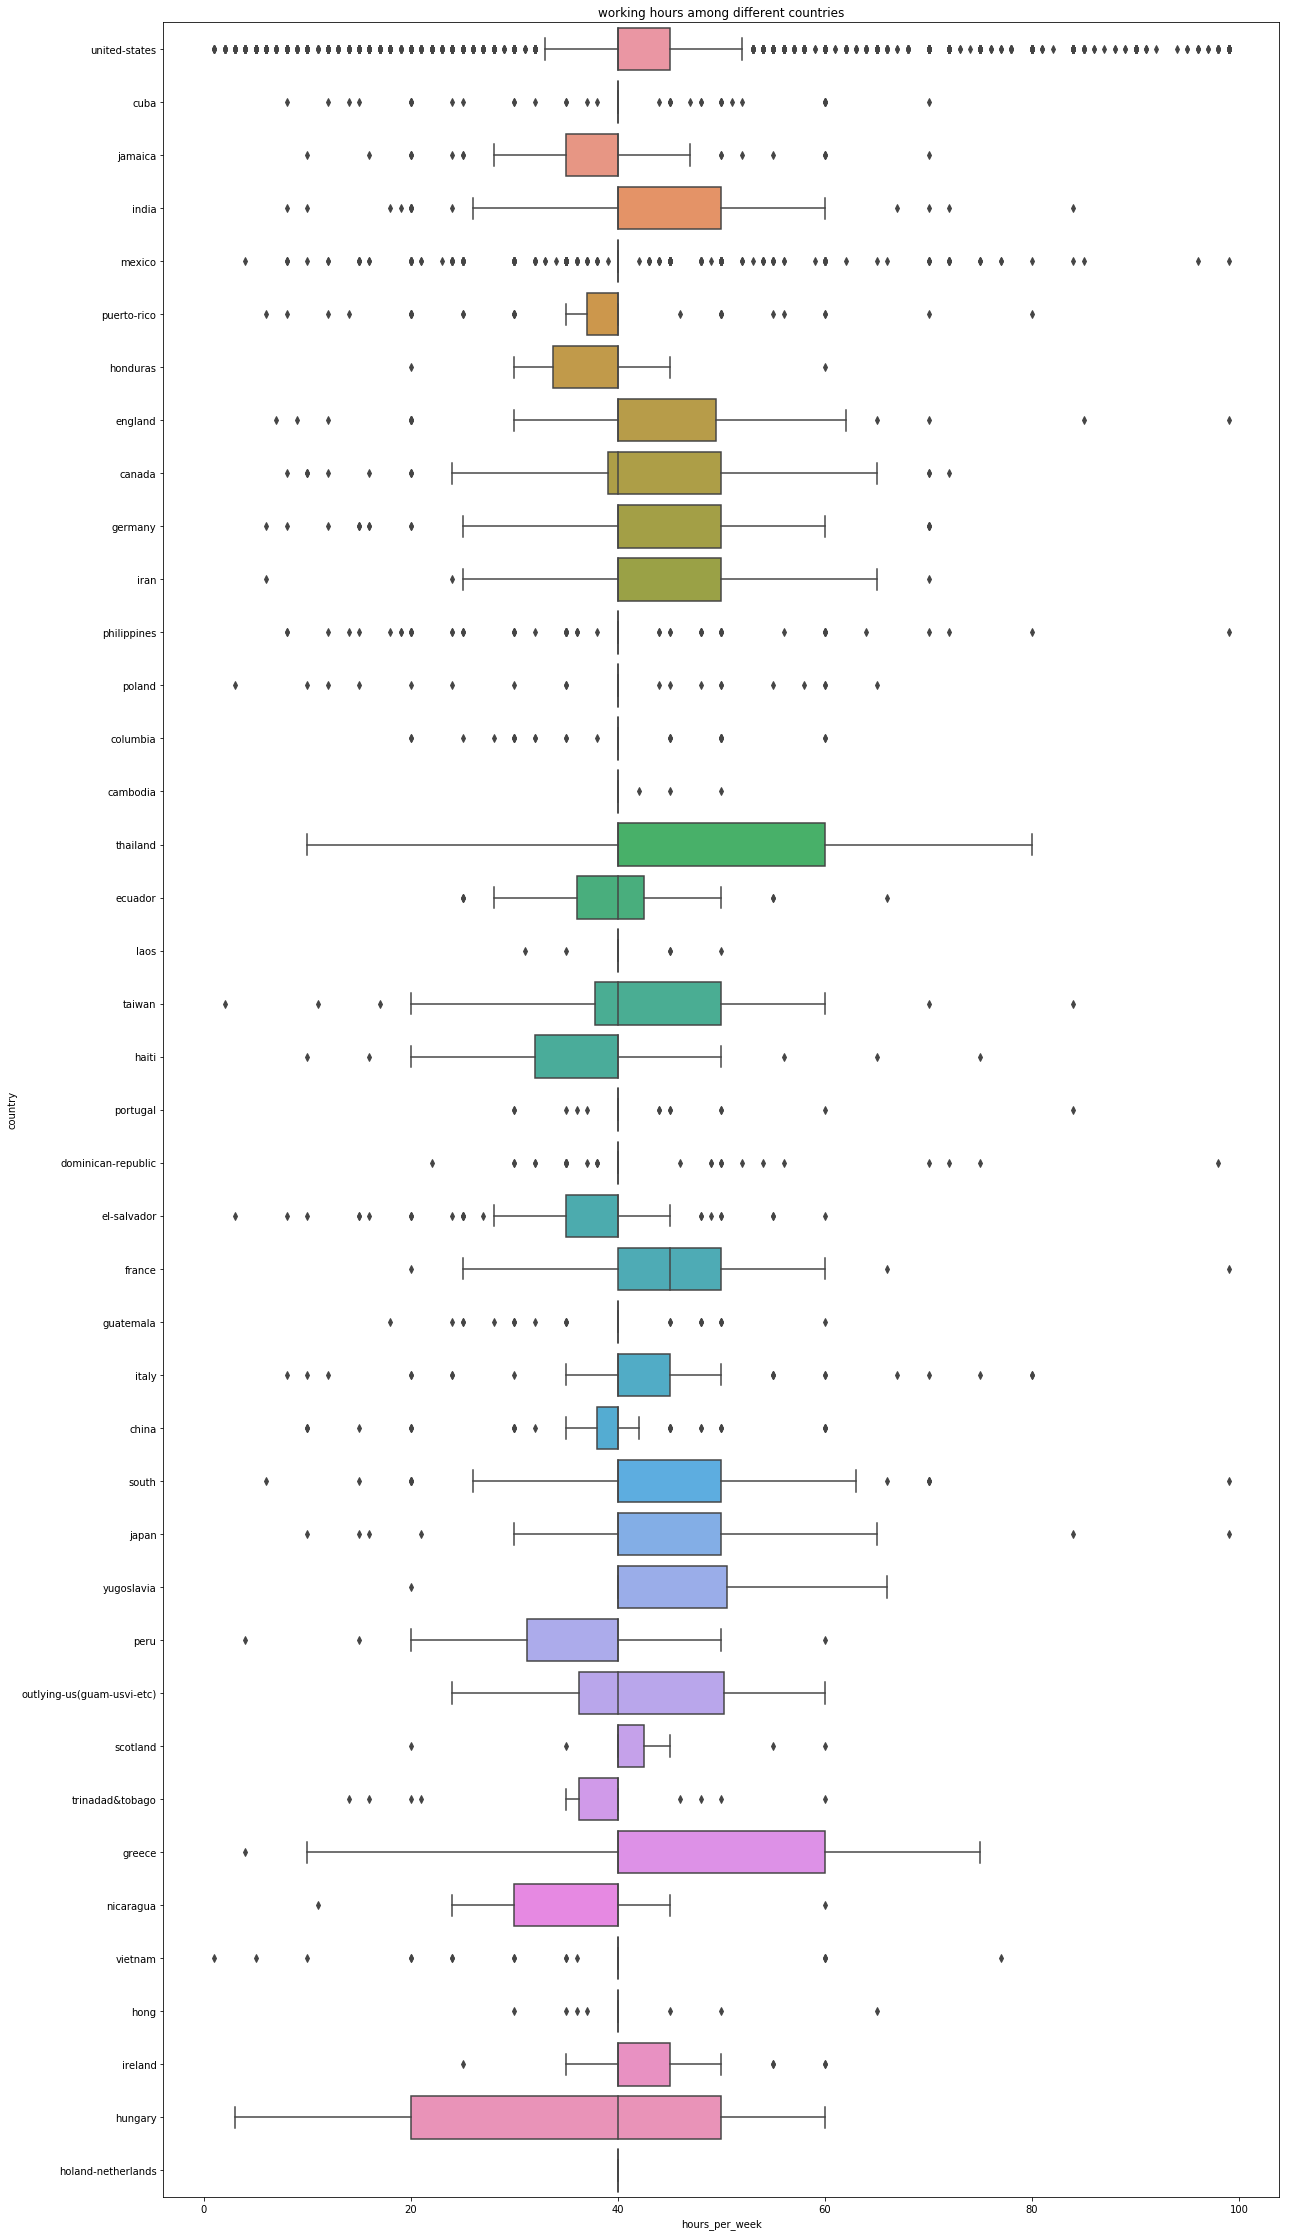

In [38]:
fig, ax = pyplot.subplots(figsize=(20,40))
plt.ylim=(1,40000)
plt.title('working hours among different countries')
sb.boxplot(x='hours_per_week', y='country', orient="h", data= adult)

Text(0.5,1,u'working hours in each sex, income')

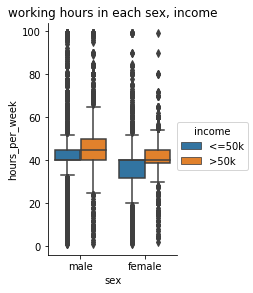

In [39]:
sb.factorplot(x="sex", y="hours_per_week",hue='income',
                   data=adult, kind="box",
                   size=4, aspect=.7)
plt.title('working hours in each sex, income')

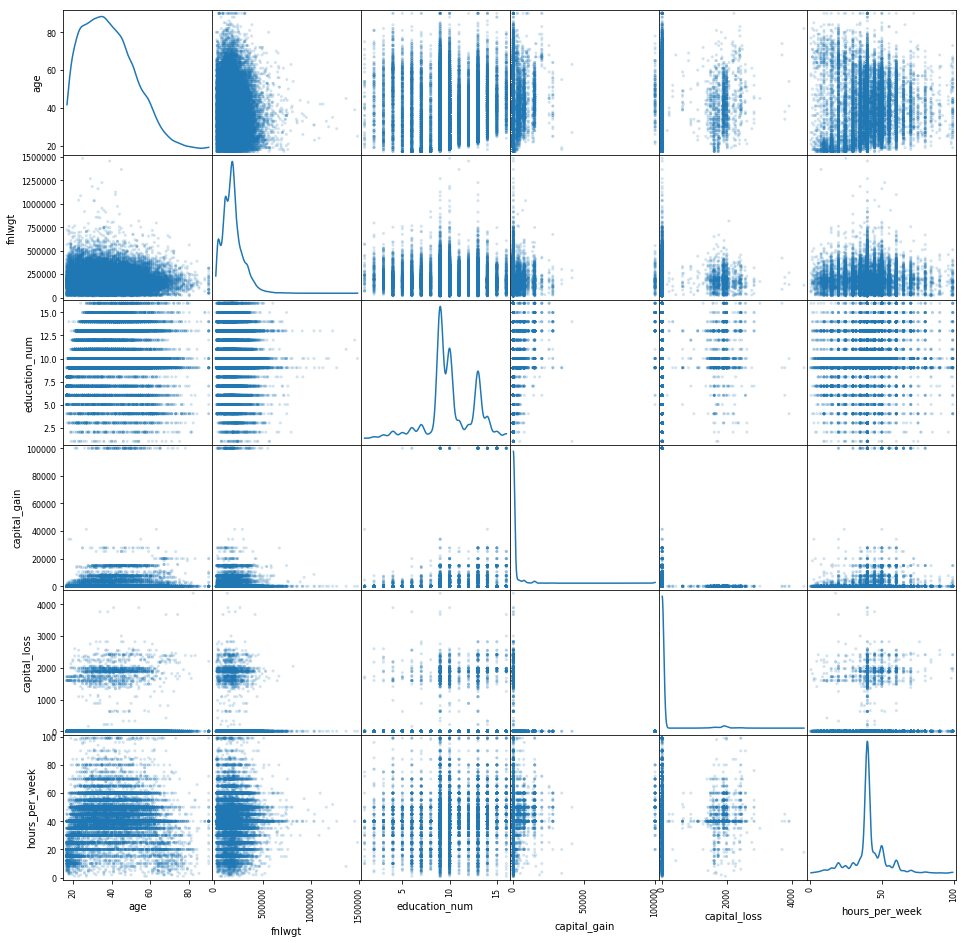

In [40]:
from pandas.plotting import scatter_matrix
scatter_matrix(adult,alpha=0.2,figsize=(16,16),diagonal='density')
plt.show()

In [41]:
corr = adult.corr()

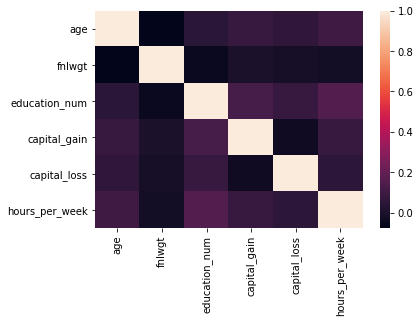

In [42]:
sb.heatmap(corr,xticklabels = corr.columns.values, yticklabels = corr.columns.values)

In [43]:
del adult['fnlwgt']

In [44]:
del adult['education']

Task 3

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
import sklearn as sk
from sklearn import metrics

In [46]:
print adult

       age         workclass  education_num                marital  \
0       39         state-gov             13          never-married   
1       50  self-emp-not-inc             13     married-civ-spouse   
2       38           private              9               divorced   
3       53           private              7     married-civ-spouse   
4       28           private             13     married-civ-spouse   
5       37           private             14     married-civ-spouse   
6       49           private              5  married-spouse-absent   
7       52  self-emp-not-inc              9     married-civ-spouse   
8       31           private             14          never-married   
9       42           private             13     married-civ-spouse   
10      37           private             10     married-civ-spouse   
11      30         state-gov             13     married-civ-spouse   
12      23           private             13          never-married   
13      32          

In [47]:
adultf = adult  #copy data

In [48]:
adultf

age         workclass  education_num                marital  \
0       39         state-gov             13          never-married   
1       50  self-emp-not-inc             13     married-civ-spouse   
2       38           private              9               divorced   
3       53           private              7     married-civ-spouse   
4       28           private             13     married-civ-spouse   
5       37           private             14     married-civ-spouse   
6       49           private              5  married-spouse-absent   
7       52  self-emp-not-inc              9     married-civ-spouse   
8       31           private             14          never-married   
9       42           private             13     married-civ-spouse   
10      37           private             10     married-civ-spouse   
11      30         state-gov             13     married-civ-spouse   
12      23           private             13          never-married   
13      32           private             12          never-married   
15      34           private              4     married-civ-spouse   
16      25  self-emp-not-inc              9          never-married   
17      32           private              9          never-married   
18      38           private              7     married-civ-spouse   
19      43  self-emp-not-inc             14               divorced   
20      40           private             16     married-civ-spouse   
21      54           private              9              separated   
22      35       federal-gov              5     married-civ-spouse   
23      43           private              7     married-civ-spouse   
24      59           private              9               divorced   
25      56         local-gov             13     married-civ-spouse   
26      19           private              9          never-married   
28      39           private              9               divorced   
29      49           private              9     married-civ-spouse   
30      23         local-gov             12          never-married   
31      20           private             10          never-married   
...    ...               ...            ...                    ...   
32526   32           private              6     married-civ-spouse   
32527   22           private             10          never-married   
32528   31           private              9     married-civ-spouse   
32529   29           private              9              separated   
32532   34           private             16     married-civ-spouse   
32533   54           private             13     married-civ-spouse   
32534   37           private             10               divorced   
32535   22           private              8          never-married   
32536   34           private             13          never-married   
32537   30           private              9          never-married   
32538   38           private             13               divorced   
32540   45         state-gov              9              separated   
32543   45         local-gov             12               divorced   
32544   31           private             14               divorced   
32545   39         local-gov             12     married-civ-spouse   
32546   37           private             12               divorced   
32547   43           private              9     married-civ-spouse   
32548   65  self-emp-not-inc             15          never-married   
32549   43         state-gov             10               divorced   
32550   43  self-emp-not-inc             10     married-civ-spouse   
32551   32           private              6     married-civ-spouse   
32552   43           private             11     married-civ-spouse   
32553   32           private             14          never-married   
32554   53           private             14     married-civ-spouse   
32555   22           private             10          never-married   
32556   27       

In [49]:
str_cols = adultf.columns[adultf.columns.str.contains('(?:workclass|education|marital|occupation|relationship|race|sex|country|)')]
clfs = {c:LabelEncoder() for c in str_cols}

In [50]:
for col, clf in clfs.items():
    adultf[col] = clfs[col].fit_transform(adultf[col])

In [51]:
adultf

age  workclass  education_num  marital  occupation  relationship  race  \
0       22          5             12        4           0             1     4   
1       33          4             12        2           3             0     4   
2       21          2              8        0           5             1     4   
3       36          2              6        2           5             0     2   
4       11          2             12        2           9             5     2   
5       20          2             13        2           3             5     4   
6       32          2              4        3           7             1     2   
7       35          4              8        2           3             0     4   
8       14          2             13        4           9             1     4   
9       25          2             12        2           3             0     4   
10      20          2              9        2           3             0     2   
11      13          5             12        2           9             0     1   
12       6          2             12        4           0             3     4   
13      15          2             11        4          11             1     2   
15      17          2              3        2          13             0     0   
16       8          4              8        4           4             3     4   
17      15          2              8        4           6             4     4   
18      21          2              6        2          11             0     4   
19      26          4             13        0           3             4     4   
20      23          2             15        2           9             0     4   
21      37          2              8        5           7             4     2   
22      18          0              4        2           4             0     2   
23      26          2              6        2          13             0     4   
24      42          2              8        0          12             4     4   
25      39          1             12        2          12             0     4   
26       2          2              8        4           2             3     4   
28      22          2              8        0           3             1     4   
29      32          2              8        2           2             0     4   
30       6          1             11        4          10             1     4   
31       3          2              9        4          11             3     2   
...    ...        ...            ...      ...         ...           ...   ...   
32526   15          2              5        2          13             0     4   
32527    5          2              9        4           0             3     4   
32528   14          2              8        2           6             5     4   
32529   12          2              8        5          11             4     4   
32532   17          2             15        2           9             0     4   
32533   37          2             12        2           3             0     1   
32534   20          2              9        0           0             4     4   
32535    5          2              7        4          10             3     2   
32536   17          2             12        4           3             1     4   
32537   13          2              8        4           2             1     2   
32538   21          2             12        0           9             4     2   
32540   28          5              8        5           0             3     4   
32543   28          1             11        0           9             4     4   
32544   14          2             13        0           7             1     3   
32545   22          1             11        2           0             5     4   
32546   20          2             11        0          12             1     4   
32547   26          2              8        2           6             0     4   
32548   48          4             14  

In [52]:
print adultf.shape

(30162, 13)


In [53]:
adultft = adultf.ix[ :,0:12]

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [54]:
adultft

age  workclass  education_num  marital  occupation  relationship  race  \
0       22          5             12        4           0             1     4   
1       33          4             12        2           3             0     4   
2       21          2              8        0           5             1     4   
3       36          2              6        2           5             0     2   
4       11          2             12        2           9             5     2   
5       20          2             13        2           3             5     4   
6       32          2              4        3           7             1     2   
7       35          4              8        2           3             0     4   
8       14          2             13        4           9             1     4   
9       25          2             12        2           3             0     4   
10      20          2              9        2           3             0     2   
11      13          5             12        2           9             0     1   
12       6          2             12        4           0             3     4   
13      15          2             11        4          11             1     2   
15      17          2              3        2          13             0     0   
16       8          4              8        4           4             3     4   
17      15          2              8        4           6             4     4   
18      21          2              6        2          11             0     4   
19      26          4             13        0           3             4     4   
20      23          2             15        2           9             0     4   
21      37          2              8        5           7             4     2   
22      18          0              4        2           4             0     2   
23      26          2              6        2          13             0     4   
24      42          2              8        0          12             4     4   
25      39          1             12        2          12             0     4   
26       2          2              8        4           2             3     4   
28      22          2              8        0           3             1     4   
29      32          2              8        2           2             0     4   
30       6          1             11        4          10             1     4   
31       3          2              9        4          11             3     2   
...    ...        ...            ...      ...         ...           ...   ...   
32526   15          2              5        2          13             0     4   
32527    5          2              9        4           0             3     4   
32528   14          2              8        2           6             5     4   
32529   12          2              8        5          11             4     4   
32532   17          2             15        2           9             0     4   
32533   37          2             12        2           3             0     1   
32534   20          2              9        0           0             4     4   
32535    5          2              7        4          10             3     2   
32536   17          2             12        4           3             1     4   
32537   13          2              8        4           2             1     2   
32538   21          2             12        0           9             4     2   
32540   28          5              8        5           0             3     4   
32543   28          1             11        0           9             4     4   
32544   14          2             13        0           7             1     3   
32545   22          1             11        2           0             5     4   
32546   20          2             11        0          12             1     4   
32547   26          2              8        2           6             0     4   
32548   48          4             14  

In [55]:
X_train, X_test, y_train, y_test = train_test_split(adultft, adult.income,test_size=0.2,random_state=0)

In [56]:
X_train

age  workclass  education_num  marital  occupation  relationship  race  \
30461   17          2              9        4           0             3     4   
18186   34          2              8        0           2             1     4   
24974   33          2              8        6           9             4     2   
25659   35          4              9        6           2             1     2   
13876   14          2              8        2           6             0     4   
1608    22          2              5        2           2             0     4   
13832   36          2              8        2           2             0     4   
27760   18          2             10        0           7             4     4   
13640   29          1             13        0           9             4     4   
26140   19          2             12        4           2             1     4   
25828   38          4             12        2           3             0     4   
21170    9          2              8        4           5             3     2   
14785    0          2              6        4           5             3     4   
31979   15          2              8        2          13             3     4   
31       3          2              9        4          11             3     2   
7198    47          1              8        2           2             0     4   
27727   24          2              7        0          13             1     4   
1499     2          2              9        4           0             1     4   
10041   32          1              4        6           5             4     4   
29986   27          2             13        2           0             0     4   
29451   15          4              8        0           3             4     4   
1564    25          0              8        5           7             2     2   
10291   42          2              5        2          13             0     2   
22092    2          5              8        4           0             3     4   
22370   32          2              3        4           7             2     4   
769     15          2              8        4           6             1     4   
11386   12          2              9        4           5             1     2   
22486   48          2              5        2           5             0     4   
16572   28          5              8        0          10             4     2   
8849    21          4             12        2           2             0     4   
...    ...        ...            ...      ...         ...           ...   ...   
2348    45          4              7        2           2             0     4   
6559    15          4              8        2           4             0     4   
7503    34          1             15        2           9             0     4   
6749    37          3              8        0           7             1     4   
29640   18          4              4        2           2             0     4   
18254   11          2              4        4           2             1     4   
28353   21          2             10        0           0             4     4   
3154    24          2              8        2          11             0     4   
26063   29          2              8        2           7             5     4   
20079   38          0             12        2           3             0     4   
11171   29          2              8        2           6             0     4   
20484   41          4             12        2           3             0     4   
18439   40          2              8        5           2             4     4   
15817   35          2              9        2           2             0     4   
21425   38          2              8        2           2             0     4   
7315     9          2              8        4           8             2     4   
17093   19          2              8        2           6             0     4   
16663   18          2             12  

In [57]:
X_train.shape

(24129, 12)

In [58]:
y_train

30461    0
18186    0
24974    0
25659    0
13876    0
1608     0
13832    0
27760    0
13640    0
26140    0
25828    1
21170    0
14785    0
31979    0
31       0
7198     0
27727    1
1499     0
10041    1
29986    0
29451    0
1564     0
10291    1
22092    0
22370    0
769      0
11386    0
22486    1
16572    0
8849     0
        ..
2348     1
6559     0
7503     1
6749     0
29640    0
18254    0
28353    0
3154     1
26063    0
20079    1
11171    1
20484    1
18439    0
15817    1
21425    0
7315     0
17093    0
16663    1
16124    0
15239    1
24018    1
22403    0
26194    0
9979     0
22924    1
14169    0
21206    1
10646    0
11687    1
2976     0
Name: income, Length: 24129, dtype: int64

In [59]:
X_test

age  workclass  education_num  marital  occupation  relationship  race  \
2135    27          2              8        4          11             1     1   
15639    4          2              9        4           0             3     4   
29059   19          2              9        2          13             0     4   
27523   13          4             10        0           2             1     4   
9280    25          4              9        2           2             0     4   
21598    7          2              8        2          13             0     2   
28780    4          1              9        4           0             1     4   
13383   15          3             12        2          11             0     4   
11015   18          2              8        2           6             0     4   
3180    13          1              8        2          10             0     4   
12753   38          2              8        6          11             4     4   
1541    45          2             14        2           9             0     4   
24235   16          2              8        2           7             0     2   
4616    19          2             12        0           0             1     4   
8082     2          2              8        4           2             3     4   
32005   22          2              8        2           6             0     4   
7702    52          5              8        2          10             0     4   
3551     7          2              9        4          11             1     2   
3635     9          2              3        2           6             0     3   
16227   37          2              8        2           2             0     4   
3312     9          2              8        2           4             0     4   
19818    3          2              9        4           5             3     4   
22240   20          2              8        2           4             0     4   
6548    11          5             13        2           3             0     4   
25566   25          5             12        0           0             1     4   
7236    23          2              5        0          13             3     4   
9822     8          2             10        2          11             5     4   
7609    23          2              9        0           6             3     4   
9738    12          2              9        4           0             3     4   
13649    3          2              9        4          13             3     4   
...    ...        ...            ...      ...         ...           ...   ...   
10376   29          2              8        2          13             0     4   
29250   16          4              8        0           2             1     4   
17848   23          2             10        5           9             2     4   
6714    44          2             12        2           9             0     4   
29488   19          2              8        4           2             1     1   
30266   42          2             13        2           9             0     4   
30992   23          3             13        4           7             3     4   
16532    1          2              6        4           7             2     2   
18180   17          2              8        2          11             0     4   
23177   33          1             14        2           0             0     1   
5520     8          2              8        4           7             1     2   
23768   17          2             13        2          11             0     4   
14774   35          2             13        2           9             0     4   
29542   26          2              9        0           2             4     4   
30492   17          2              9        4          11             3     2   
16745   16          2              8        0           5             3     4   
9513     7          2              9        4           7             1     4   
21885   23          2             12  

In [60]:
X_test.shape

(6033, 12)

In [61]:
y_test

2135     0
15639    0
29059    0
27523    0
9280     0
21598    0
28780    0
13383    0
11015    1
3180     1
12753    0
1541     0
24235    0
4616     0
8082     0
32005    1
7702     0
3551     0
3635     0
16227    1
3312     0
19818    0
22240    0
6548     1
25566    0
7236     0
9822     1
7609     0
9738     0
13649    0
        ..
10376    0
29250    0
17848    0
6714     1
29488    0
30266    1
30992    0
16532    0
18180    0
23177    1
5520     0
23768    0
14774    1
29542    0
30492    0
16745    0
9513     0
21885    1
21657    1
25253    0
956      1
22322    0
2776     0
27457    0
24011    0
4944     1
5031     1
18671    0
10118    1
25645    0
Name: income, Length: 6033, dtype: int64

In [62]:
y_test.shape

(6033,)

In [63]:
clf = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_leaf=12)

In [64]:
fit = clf.fit(X_train, y_train)

In [65]:
y_pre = fit.predict(X_test)

In [66]:
y_pre

array([0, 0, 0, ..., 0, 0, 0])

In [67]:
y_pre.shape

(6033,)

In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
cm = confusion_matrix(y_test, y_pre)
print cm

[[4219  313]
 [ 585  916]]


In [70]:
from sklearn.metrics import classification_report

In [71]:
target_names = ['<50K', '>=50K']

In [72]:
print classification_report(y_test, y_pre,target_names=target_names)

             precision    recall  f1-score   support

       <50K       0.88      0.93      0.90      4532
      >=50K       0.75      0.61      0.67      1501

avg / total       0.85      0.85      0.85      6033



In [73]:
sk.metrics.confusion_matrix(y_test, y_pre, labels=None, sample_weight=None)

array([[4219,  313],
       [ 585,  916]])

In [74]:
#K folds cross validation

In [75]:
print "[Train/test split] score: {:.5f}".format(clf.score(X_test, y_test))

[Train/test split] score: 0.85115


In [76]:
from sklearn.model_selection import KFold

In [77]:
kf = KFold(n_splits=10)

In [78]:
for train_index, test_index in kf.split(adultft):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_train, X_test
    y_train, y_test = y_train, y_test

('TRAIN:', array([ 3017,  3018,  3019, ..., 30159, 30160, 30161]), 'TEST:', array([   0,    1,    2, ..., 3014, 3015, 3016]))
('TRAIN:', array([    0,     1,     2, ..., 30159, 30160, 30161]), 'TEST:', array([3017, 3018, 3019, ..., 6031, 6032, 6033]))
('TRAIN:', array([    0,     1,     2, ..., 30159, 30160, 30161]), 'TEST:', array([6034, 6035, 6036, ..., 9047, 9048, 9049]))
('TRAIN:', array([    0,     1,     2, ..., 30159, 30160, 30161]), 'TEST:', array([ 9050,  9051,  9052, ..., 12063, 12064, 12065]))
('TRAIN:', array([    0,     1,     2, ..., 30159, 30160, 30161]), 'TEST:', array([12066, 12067, 12068, ..., 15079, 15080, 15081]))
('TRAIN:', array([    0,     1,     2, ..., 30159, 30160, 30161]), 'TEST:', array([15082, 15083, 15084, ..., 18095, 18096, 18097]))
('TRAIN:', array([    0,     1,     2, ..., 30159, 30160, 30161]), 'TEST:', array([18098, 18099, 18100, ..., 21111, 21112, 21113]))
('TRAIN:', array([    0,     1,     2, ..., 30159, 30160, 30161]), 'TEST:', array([21114, 2111

In [79]:
for k, (train_index, test_index) in enumerate(kf.split(adultft)):
 
    X_train, X_test = X_train, X_test
    y_train, y_test = y_train, y_test
 
    clf.fit(X_train, y_train)
    print "[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test))


[fold 0] score: 0.85115
[fold 1] score: 0.85115
[fold 2] score: 0.85148
[fold 3] score: 0.85115
[fold 4] score: 0.85115
[fold 5] score: 0.85148
[fold 6] score: 0.85115
[fold 7] score: 0.85148
[fold 8] score: 0.85115
[fold 9] score: 0.85115


In [80]:
from sklearn.metrics import accuracy_score

In [81]:
accuracy_score(y_test, clf.predict(X_test))

0.8511519973479198

In [82]:
metrics.mean_squared_error(y_test, y_pre)

0.14884800265208023

In [83]:
# Tree visualization

In [84]:
from sklearn import tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz 

In [85]:
adult_feature_name = adult.columns[0:13]

In [86]:
adult_feature_name

Index([u'age', u'workclass', u'education_num', u'marital', u'occupation',
       u'relationship', u'race', u'sex', u'capital_gain', u'capital_loss',
       u'hours_per_week', u'country', u'income'],
      dtype='object')

In [87]:
adult_target_name = clf.classes_

In [88]:

adult_target_name

array([0, 1])

In [89]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=adult.columns[0:12],  
                         class_names=True,
                         filled=True, rounded=True,
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 


In [90]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=adult.columns[0:12],  
                         class_names=True,
                         filled=True, rounded=True,
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
graph 

In [91]:
graph.write_png("tree.png")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.789585 to fit



True

In [ ]:
#KNN 

In [92]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer,LabelEncoder
import pandas as pd
import scipy

import urllib

import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn import metrics

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt  

/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [93]:
X_prime = adultf.ix[:,(0,1,2,3,4,5,6,7,8,9,10,11)].values
y = adultf.ix[:,12].values
X = preprocessing.scale(X_prime)
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=.33,random_state = 17)

/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [94]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print accuracy_score(y_test, pred)

0.820675105485232


In [95]:
myList = list(range(1,30))

In [96]:
neighbors = filter(lambda x: x % 2 != 0, myList)

In [97]:
cv_scores = []

In [98]:
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [99]:
MSE = [1 - x for x in cv_scores]

In [100]:
optimal_k = neighbors[MSE.index(min(MSE))]
print "The optimal number of neighbors is %d" % optimal_k

The optimal number of neighbors is 19


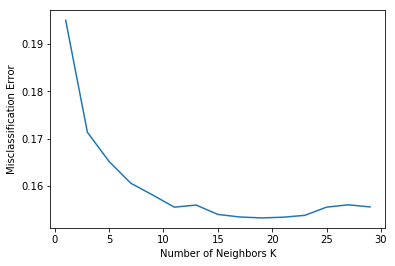

In [101]:
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [102]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print accuracy_score(y_test, pred)

0.8358448864777979


In [103]:
y_expect = y_test
y_pred = knn.predict(X_test)
print(metrics.classification_report(y_expect,y_pred))

             precision    recall  f1-score   support

          0       0.88      0.91      0.89      7450
          1       0.69      0.62      0.66      2504

avg / total       0.83      0.84      0.83      9954



In [104]:
from sklearn.model_selection import KFold

In [105]:
kf = KFold(n_splits=10)

In [106]:
for k, (train_index, test_index) in enumerate(kf.split(adultf)):
 
    X_train, X_test = X_train, X_test
    y_train, y_test = y_train, y_test
 
    knn.fit(X_train, y_train)
    print "[fold {0}] score: {1:.5f}".format(k, knn.score(X_test, y_test))

[fold 0] score: 0.83584
[fold 1] score: 0.83584
[fold 2] score: 0.83584
[fold 3] score: 0.83584
[fold 4] score: 0.83584
[fold 5] score: 0.83584
[fold 6] score: 0.83584
[fold 7] score: 0.83584
[fold 8] score: 0.83584
[fold 9] score: 0.83584
